<b>Import necessary libaries:</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import scipy.stats as stats
import statsmodels.api as sma
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#pd.options.mode.copy_on_write = True

import warnings
warnings.filterwarnings('ignore')

In [2]:
!python -V

Python 3.11.7


## Problem statement:
- The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.
- This dataset contains information about used cars. This data can be used for a lot of purposes such as Used Car Price Prediction using different Machine Learning Techniques.
- Source  - https://www.kaggle.com/datasets/manishkr1754/cardekho-used-car-data/data

## Primary Goal:
- The goal of the project is to predict the price of a second hand car that will be listed in future in the E-Commerce website using statistical modelling and machine learning techniques.

<hr>

## Load the dataset:

In [3]:
df = pd.read_csv('cardekho_dataset.csv') # load the .csv file into a Pandas dataframe
df.drop(columns='Unnamed: 0',inplace=True) # drop the obsolete index column
df.head() # print first 5 rows of the DataFrame

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


<hr>

# Data dictionary: (Feature Information)

- <b>car_name</b> = Car's Full name, which includes brand and specific model name. [<u>object</u>]
- <b>brand</b> = Exact brand Name of the particular car. [<u>object</u>]
- <b>model</b> = Exact model name of the car of a particular brand. [<u>object</u>]
- <b>vehicle_age</b> = The count of years since car was bought. [<u>int</u>]
- <b>km_driven</b> = Number of kilometers the car has been driven [<u>int</u>] 
- <b>seller_type</b> = Type of seller that is selling the used car [<u>object</u>]
- <b>fuel_type</b> = Fuel used in the used car, which was put up on sale. [<u>object</u>]
- <b>transmission_type</b> = Transmission used in the used car, which was put on sale. [<u>object</u>]
- <b>mileage</b> = Number of kilometers the car runs per litre. [<u>float</u>]
- <b>engine</b> = Engine capacity in cc(cubic centimeters) [<u>int</u>]
- <b>max_power</b> = Max power the car produces in BHP. [<u>float</u>]
- <b>seats</b> = Total number of seats in car. [<u>int</u>]
- <b>selling_price</b> = The sale price which was put up on website. [<u>float/continous</u> - <b>target variable</b>]

<hr>

## Data dimensions:

In [4]:
df.shape # Rows = 15411 & Columns = 13

(15411, 13)

In [5]:
df.columns # Name of the columns = 25

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

<b><u>Inference</u></b>:

Data dimensions:
- Rows = 15411
- Columns = 13<br>
  
Target variable:
- The 'selling_price' is the target variable.

Machine learning model used:
- Since the target variable is 'Continous', we will be building a Supervised Learning Regression model.

<hr>

## Data type check:

In [6]:
df.info() # display column non-null value count & associated data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


#### Check the Numeric column values & Categorical column sub-classes:

In [7]:
for column in df.columns: 
    print(df[column].value_counts(),end='\n\n') 

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1

#### Handling mismatched data types / values:

- <u>'car_name'</u> : ISUZU -> Isuzu (duplicate subclass value rectified)

In [8]:
df['brand'] = df['brand'].replace({'ISUZU':'Isuzu'})

<b><u>Inference:</u></b>
- All columns have the appropriate data types.
- The column 'car_name' had a duplicate value which has been rectified (ISUZU -> Isuzu)

<hr>

## Null values:
#### Null value detection:

In [9]:
for column in df.select_dtypes(include=object).columns: # check if missing values are indirectly hiding in the Categorical columns
    print(df[column].value_counts(),end='\n\n')

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Isuzu              10
Lexus              10
Bentley             3
Maserati            2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1

In [10]:
for column in df.select_dtypes(exclude=object).columns: # check if missing values are indirectly hiding in the Categorical columns
    print(df[column].value_counts(),end='\n\n')

vehicle_age
4     2252
5     2117
3     1926
6     1924
7     1438
8     1282
2     1145
9     1027
10     710
11     551
12     293
13     237
1      221
14     129
15      90
16      25
17      17
18      11
19       5
0        5
21       3
29       1
22       1
25       1
Name: count, dtype: int64

km_driven
50000      553
40000      477
70000      466
60000      449
30000      363
          ... 
64705        1
51930        1
5200         1
36977        1
3800000      1
Name: count, Length: 3688, dtype: int64

mileage
18.90    632
18.60    404
17.00    339
24.30    292
28.40    279
        ... 
7.94       1
10.60      1
12.39      1
6.00       1
13.53      1
Name: count, Length: 411, dtype: int64

engine
1197    2436
1248    1668
998     1174
1498    1095
2179     669
        ... 
3598       1
3628       1
1330       1
3855       1
4163       1
Name: count, Length: 110, dtype: int64

max_power
74.00     791
88.50     589
81.80     544
98.60     424
67.04     390
         ... 
450.00

In [11]:
df.isnull().sum() # count of missing values

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [12]:
(df.isnull().sum() / len(df)) * 100 # % of null values in each column

car_name             0.0
brand                0.0
model                0.0
vehicle_age          0.0
km_driven            0.0
seller_type          0.0
fuel_type            0.0
transmission_type    0.0
mileage              0.0
engine               0.0
max_power            0.0
seats                0.0
selling_price        0.0
dtype: float64

- <u>'seats'</u> : (There are 2 cars with 0 seats)

In [13]:
df[df['seats']==0] # There are 2 missing values in 'seats' columns, we can't have cars with 0 seats

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3217,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12619,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


- 'vehicle_age'

In [14]:
df[df['vehicle_age']==0] # There are 4 missing values in 'vehicle_age' column
# Looking at index '5078', '10315' & '12157' 'km_driven' they seem to be cars which have been sparsely driven
# Most probably these cars have been driven a year at maximum

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
5078,Maruti Ignis,Maruti,Ignis,0,5000,Individual,Petrol,Manual,20.89,1197,81.80,5,550000
7789,Mahindra KUV,Mahindra,KUV,0,30000,Individual,Petrol,Manual,18.15,1198,82.00,6,400000
10315,BMW 5,BMW,5,0,2000,Dealer,Diesel,Automatic,22.48,1995,187.74,5,4850000
11486,BMW 5,BMW,5,0,2000,Dealer,Diesel,Automatic,22.48,1995,187.74,5,4850000
12157,Maruti S-Presso,Maruti,S-Presso,0,5000,Individual,Petrol,Manual,21.70,998,67.00,5,500000


#### Null value imputation:

- <u>'seats'</u> : (There are 2 cars with 0 seats)

In [15]:
df.loc[df['seats'] == 0, 'seats'] = 5 # 'Honda city' & 'Nissan Kicks' car  will have 5 seats 
df[df['seats']==0] # verify if the missing values have been imputated

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


<b><u>Inference:</u></b>

- ‘seats’:<br>
There were 2 indirect missing values for ‘Honda City’ & ‘Nissan Kicks’ which as ‘0’ as the seat value
We have imputed the missing values according to the car’s make since it doesn’t make sense to have a car with 0  seats

- ‘vehicle_age’:<br>
There were 4 indirect missing values for 4 rows in this column. After closer inspection we found that these are cars were new cars hence had ‘0’ years as the column value which seems appropriate given the ‘kilometers_driven’.
Hence, we didn’t need to treat them as missing values. 

### Duplicate rows:

In [16]:
df.shape # data dimensions before drop

(15411, 13)

In [17]:
df[df.duplicated()] # there are no duplicate columns

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
197,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
360,Maruti Baleno,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1353,Maruti Swift Dzire,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1429,Maruti Wagon R,Maruti,Wagon R,13,100000,Individual,Petrol,Manual,18.90,1061,67.00,5,150000
1485,Hyundai i20,Hyundai,i20,3,50000,Individual,Petrol,Manual,18.60,1197,81.83,5,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [18]:
df.drop_duplicates(inplace=True)
df.shape # data dimensions after drop

(15244, 13)

<b><u>Inference</u></b>:
   - We don't want to introduce unwanted bias or noise into the model by feeding it duplicate data into it, hence we have dropped the (167) duplicate rows from the dataset.
 - There were 167 duplicate values in the data frame which have been dropped to avoid confusion during model building.
 - No. of rows = 15244 (after dropping duplicate values)

<hr>

#### <u>Skewness</u> : Represents the asymmetry of the distribution of data / how it differs from normal distribution

In [19]:
df.select_dtypes(include=np.number).skew()

vehicle_age       0.833522
km_driven        28.228987
mileage           0.110013
engine            1.669372
max_power         2.486647
seats             2.090785
selling_price    10.108896
dtype: float64

<u><b>Inference</u></b>:<br>

<b>High Positive skewness (>1)</b> (presence of outliers in higher scale & Mean>Median>Mode)<br>
- km_driven (28.2)
- selling_price (10.1)
- max_power (2.4)
- seats (2)
- engine (1.6)

<b>Moderate Positive skewness (0.5 to 1)</b> (presence of outliers in higher scale & Mean > Median > Mode)
- vehicle_age (0.8)
  
<b>Near Normal distribution (-0.5 to 0.5 / ~0)</b> (No outliers & Mean = Median = Mode)
- mileage (0.1)

#### <u>Kurtosis</u> : Explains how the tails of the data differ from normal distribution:

In [20]:
df.select_dtypes(include=np.number).kurt()

vehicle_age         0.763481
km_driven        1845.455476
mileage            -0.162285
engine              4.371936
max_power          11.945229
seats               3.517908
selling_price     284.282185
dtype: float64

<u><b>Inference</b></u>:<br>

<b>Leptokurtic (>3)</b> (Thick tails, large no. of values closer to mean, large no. of outliers)
- km_driven (1845.4)
- selling_price (284.2)
- max_power (11.9)
- engine (4.3)
- seats (3.5)

  
<b>Mesokurtic </b> (No tails / negligible tails)
- vehicle_age (0.76)
- mileage (-0.16)

## <u>Statistical summary</u> (of numeric values):

<b><u>Descriptive statistics</u></b>:

In [21]:
df.describe(include=np.number)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326817,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.806464,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


<b>Inference</b>:

- vehicle_age<br>
 Average = 6, Minimum = 0 (may be indicating brand new cars), Maximum = 29 years (indicating very old vehicles on sale), Standard deviation = 3 (minimal variability of data)

- km_driven<br>
  Average = 55639.4, Minimum = 100 (There are cars which have been sparingly driven), Maximum = 3800000 kilometers (There are cars which have been driven a lot), Standard deviation  = 51618.5 (indicating high variability in data /high spread of data points away from the mean)

- mileage<br>
  Average = 19.7 liters, Minimum = 4 (There might be sports or luxury cars on sale), Maximum = 33.5 liters. (There cars smaller hatchbacks and sedans which give good mileage), Looking at the minimum, Q1 , Q3 & maximum we can observe the presence of outliers both in lower scale and the higher scale,<br>  Standard deviation = 4 (low variability of the data)

- engine<br>
  Average = 1486, Minimum = 793 (There are small cars), Maximum = 6592 (also cars with higher cubic capacity probably sports or luxury cars)
  Standard deviation = 520 (High value) (indicates high variablity of  data / high spread of data points away from the mean)

- max_power<br>
  Average = 100.6 bhp, Minimum = 38.4 (There are cars with smaller power), Maximum = 626 (probably cars like SUV and sports cars that have high power)
, Standard deviation = (Moderate variability of data)

- seats<br>
  Average = 5, Minimum = 0 (We need to handle missing values), Maximum = 9  (probably SUV or Mini van cars), Standard deviation = 0.8 (low variability of data)

- selling_price<br>
  Average = 774701.4, Minimum = 40000 (There are cars with low price), Maximum = 39500000  (as well as cars with very high price), Standard deviation = 894676.1 (high variability of data)

<hr>

## <u>Summary</u> (of categorical values):

In [22]:
for car_name in df['car_name'].value_counts().index:
    print(car_name) # check the name of each car on sale

Hyundai i20
Maruti Swift Dzire
Maruti Swift
Maruti Alto
Honda City
Maruti Wagon R
Hyundai Grand
Toyota Innova
Hyundai Verna
Hyundai i10
Ford Ecosport
Volkswagen Polo
Maruti Baleno
Honda Amaze
Maruti Ciaz
Maruti Ertiga
Hyundai Creta
Mahindra XUV500
Renault KWID
Maruti Vitara
Mahindra Scorpio
Ford Figo
Volkswagen Vento
Maruti Celerio
Renault Duster
Mahindra Bolero
Toyota Fortuner
Skoda Rapid
Honda Jazz
BMW 3
Tata Tiago
Hyundai Santro
Maruti Eeco
Mercedes-Benz E-Class
BMW 5
Mercedes-Benz C-Class
Honda WR-V
Audi A4
Tata Safari
Skoda Superb
Datsun GO
Tata Nexon
Datsun RediGO
Maruti Ignis
Audi A6
Mahindra KUV
Ford Aspire
Mahindra Thar
Honda Civic
Skoda Octavia
Hyundai Venue
BMW X1
Jaguar XF
Hyundai Elantra
Land Rover Rover
Ford Endeavour
Tata Hexa
Jeep Compass
Tata Tigor
Mercedes-Benz GL-Class
Mercedes-Benz S-Class
BMW 7
Toyota Camry
Ford Freestyle
Honda CR-V
Kia Seltos
Mahindra KUV100
BMW X5
Mahindra Marazzo
Audi Q7
BMW X3
Tata Harrier
MG Hector
Maruti Dzire VXI
BMW 6
Mini Cooper
Toyota Yar

In [23]:
for column in df.select_dtypes(exclude=np.number).columns[df.select_dtypes(exclude=np.number).columns!='car_name']:
    print(df[column].value_counts(),end='\n\n') # Display sub-classes of each categorical column

brand
Maruti           4933
Hyundai          2952
Honda            1476
Mahindra          999
Toyota            789
Ford              776
Volkswagen        614
Renault           527
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Land Rover         50
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Isuzu               9
Lexus               9
Bentley             3
Maserati            2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

model
i20             898
Swift Dzire     875
Swift           774
Alto            768
City            750
               ... 
Ghibli            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: count, Length: 120, dtype: int64

seller_type
Dealer 

In [24]:
df.describe(exclude=np.number)

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15244,15244,15244,15244,15244,15244
unique,121,31,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,898,4933,898,9459,7555,12094


<u>Inference</u>:

- 'car_name'<br> 
    Subclasses = '121' unique cars on sale. Mode = 'Hyundai i20' (906)<br>
    Huge no. of subclasses.
    
- 'brand' <br>
    Subclasses = '31'. Mode = 'Maruti' (4992)<br>
    Moderate no. of subclasses.<br>
   
- 'model'<br>
    Subclasses = '120'. Mode = 'i20' (906)  <br>
    Huge no. of subclasses.<br>
    
- seller_type<br>
     Subclasses = '3' (Dealer, Individual & Trustmark Dealer), Mode = 'Dealer' (7643)<br>
     Very small no. of subclasses.<br>
   
- fuel_type	<br>
     Subclasses = '5' unique fuel types ('Petrol, Diesel, CNG, LPG, Electric), Mode = 'Petrol' (7643)<br>
     Small no. of subclasses.<br>

- transmission_type<br>
     Subclasses = '2' (Manual, Automatic), Mode = 'Manual' (12225)<br>
     Very small no. of subclasses

In [25]:
df[['car_name','brand','model']] #  We can see car_name column is the combination of 'brand' & 'model' columns
                                 # All three features represent the same information to identify the name (brand and model) of the car

,car_name,brand,model
0,Maruti Alto,Maruti,Alto
1,Hyundai Grand,Hyundai,Grand
2,Hyundai i20,Hyundai,i20
3,Maruti Alto,Maruti,Alto
4,Ford Ecosport,Ford,Ecosport
...,...,...,...
15406,Hyundai i10,Hyundai,i10
15407,Maruti Ertiga,Maruti,Ertiga
15408,Skoda Rapid,Skoda,Rapid
15409,Mahindra XUV500,Mahindra,XUV500


<hr>

### Numeric variables:

In [26]:
df_num = df.select_dtypes(include=np.number)
df_num

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
0,9,120000,19.70,796,46.30,5,120000
1,5,20000,18.90,1197,82.00,5,550000
2,11,60000,17.00,1197,80.00,5,215000
3,9,37000,20.92,998,67.10,5,226000
4,6,30000,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000
15407,2,18000,17.50,1373,91.10,7,925000
15408,6,67000,21.14,1498,103.52,5,425000
15409,5,3800000,16.00,2179,140.00,7,1225000


In [27]:
df_num.info() # quick summary check before proceeding to EDA

<class 'pandas.core.frame.DataFrame'>
Index: 15244 entries, 0 to 15410
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vehicle_age    15244 non-null  int64  
 1   km_driven      15244 non-null  int64  
 2   mileage        15244 non-null  float64
 3   engine         15244 non-null  int64  
 4   max_power      15244 non-null  float64
 5   seats          15244 non-null  int64  
 6   selling_price  15244 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 952.8 KB


### Categorical variables

In [28]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual
2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual
3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual
4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual
...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual
15407,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual
15408,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual
15409,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual


In [29]:
df_cat.info() # quick summary check before proceeding to EDA

<class 'pandas.core.frame.DataFrame'>
Index: 15244 entries, 0 to 15410
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   car_name           15244 non-null  object
 1   brand              15244 non-null  object
 2   model              15244 non-null  object
 3   seller_type        15244 non-null  object
 4   fuel_type          15244 non-null  object
 5   transmission_type  15244 non-null  object
dtypes: object(6)
memory usage: 833.7+ KB


<hr>

## Exploratory Data Analysis:
### I) UNIVARIATE ANALYSIS:
#### i) Numeric variables:

In [30]:
df_num.columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

<u><b>Box plot</b></u>: (IQR, Min, 25%, 50%, 75%, Max & Outlier detection)

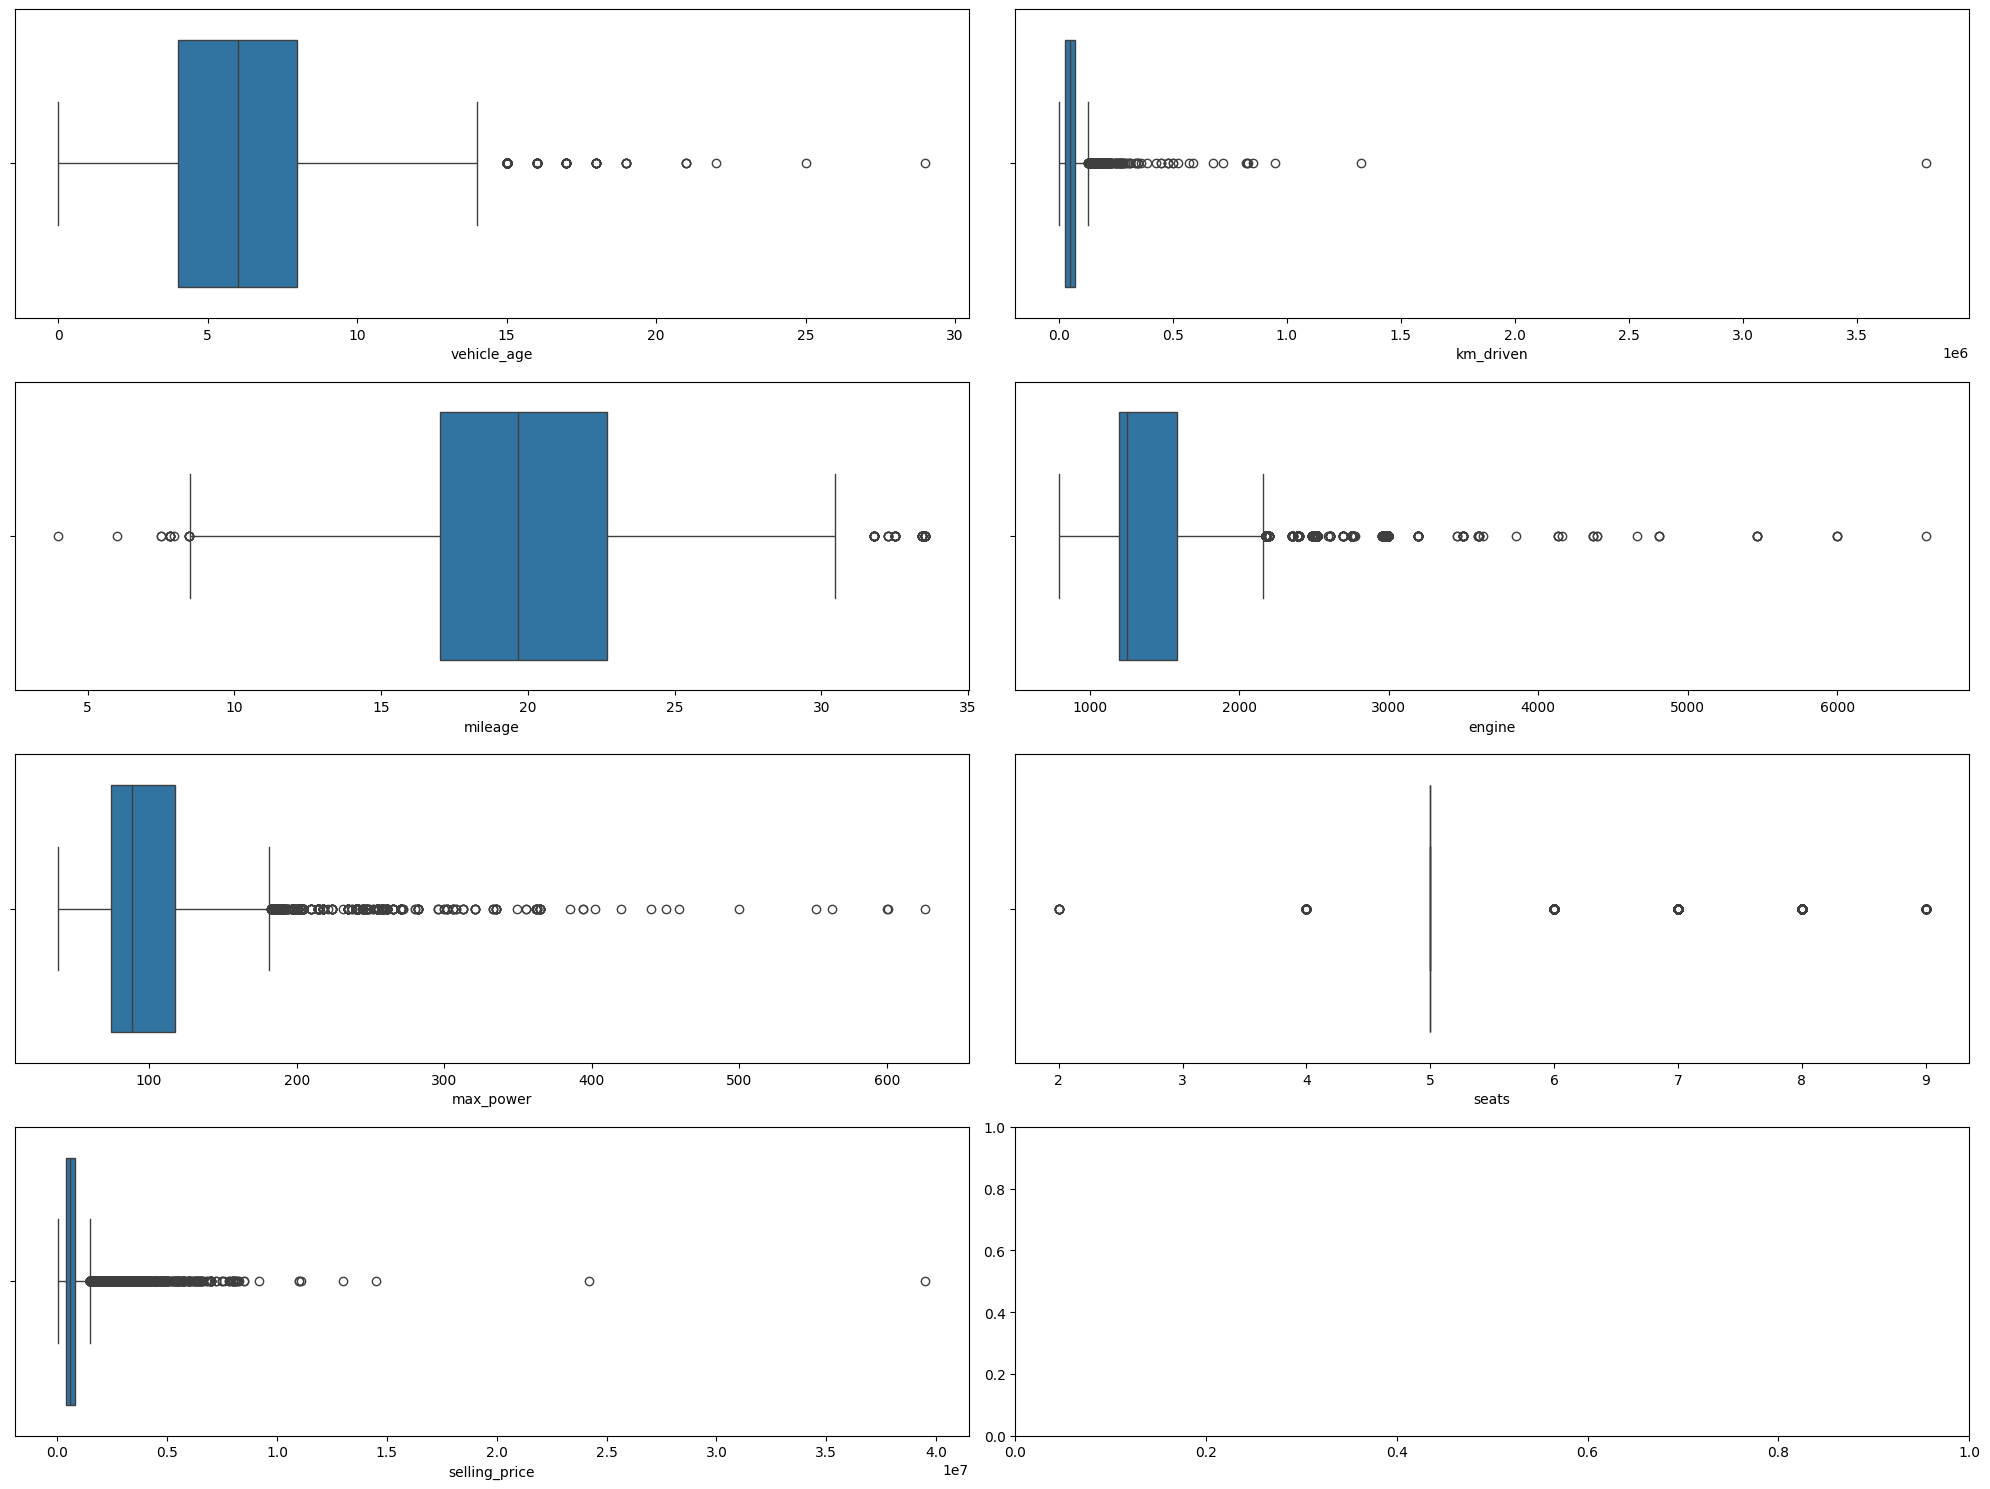

In [31]:
fig,ax = plt.subplots(4,2,figsize=(20,15))

for col,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(x=col,data=df_num,ax=subplot)
plt.tight_layout()
plt.show()

<u><b>Histogram</b></u> (Detect skewness & visualize the distribution of the data):

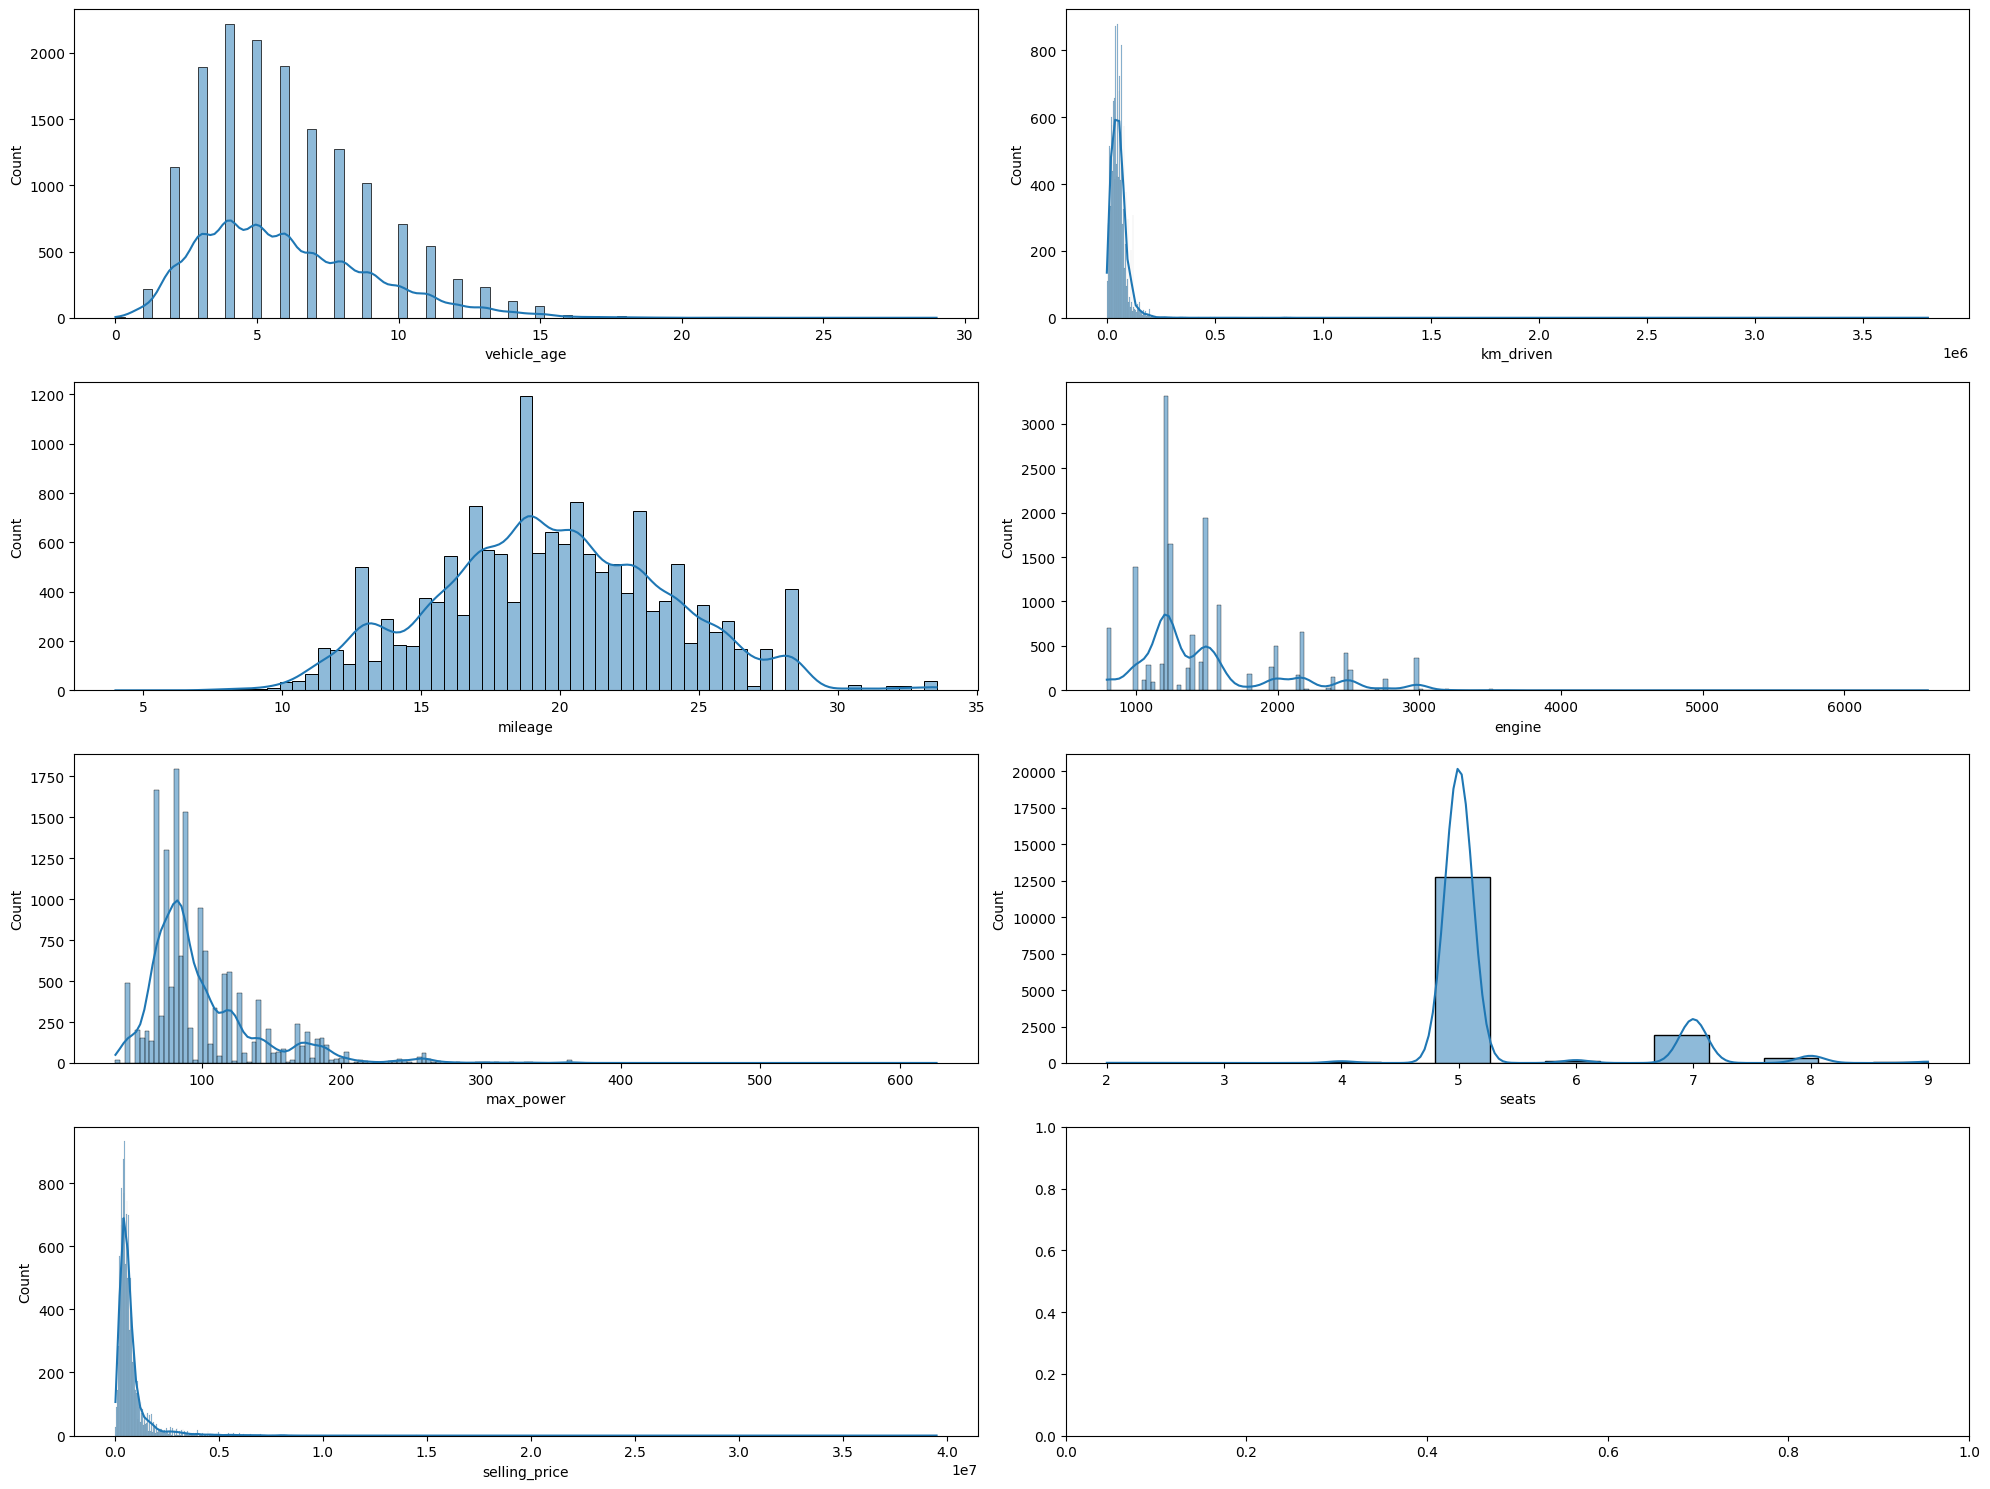

In [32]:
fig,ax = plt.subplots(4,2,figsize=(20,15))

for col,subplot in zip(df_num.columns,ax.flatten()):
    sns.histplot(x=col,data=df_num,ax=subplot,kde=True)
plt.tight_layout()
plt.show()

<b><u>Inference</u>:<b>
 
'vehicle_age' :
- Distribution of data : High positive skewness(0.83), indicating presence of few outliers in the higher scale.
- Most of the vehicle age lie between 4 and 8 years.
- We can observe a maximum outlier value of 29 years.

‘km_driven’ :
- Distribution of data : High positive skewness(28.2), indicating presence of outliers in the higher scale & further notice huge no. of outliers.
- Most of the vehicles have been driven around 30000 and 70000 kilometers indicating mgiht have been sparsely used.
- We can observe a maximum outlier value of 3800000 years indicating there are also cars on sale which have been used a lot.

‘mileage’ :
- Distribution of data : Near normal distribution(0.11). 
- Most of the vehicles give a mileage between 17 and 22.7, indicating most of the cars have acceptable mileage.
- We can observe a maximum outlier value of 33.54 mileage, which is a very good mileage for a second had car.

'engine' :
- Distribution of data : High positive skewness(1.6), indicating presence of outliers in the higher scale & we can notice huge no. of outliers.
- Most of the vehicles have engine capacity between 1197 and 1582, indicating they might be small hatchbacks.
- We can observe a maximum outlier value of 6592, which might be a luxury or sports car.

'max_power'
- Distribution of data : High positive skewness(2.4) indicating, presence of outliers in the higher scale & we can notice huge no. of outliers.
- Most of the vehicles have maximum power between 74 and 117.3, indicating most of the cars might be small hatchbacks or sedans.
- We can observe a maximum outlier value of 626, which might be a luxury or sports car.

'seats'
- Distribution of data : High positive skewness(2), indicating presence of outliers in higher scale.
- Most of the cars seems to have 5 seats followed by 7 seats & 6 seats.
- There are even cars with 9 seats which may be mini vans & cars with 2 seats which may be luxury or sports cars.

'selling_price'
- Distribution of data : High positive skewness(10.1) indicating, presence of outliers in higher scale & we can notice huge no. of outliers.
- Most of the vehicles have maximum power between 385000 and 825000, indicating they might be small hatchbacks.
- We can observe a maximum outlier value of 39500000, which might be a luxury or sports car.
- Target variable doesn't follow normal distribution.

#### Categorical variables: 

In [33]:
df_cat.columns

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

In [34]:
for column in df_cat.columns:
    print(df[column].value_counts(),end='\n\n')

car_name
Hyundai i20           898
Maruti Swift Dzire    875
Maruti Swift          774
Maruti Alto           768
Honda City            750
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64

brand
Maruti           4933
Hyundai          2952
Honda            1476
Mahindra          999
Toyota            789
Ford              776
Volkswagen        614
Renault           527
BMW               436
Tata              421
Skoda             333
Mercedes-Benz     332
Audi              190
Datsun            170
Jaguar             58
Land Rover         50
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Isuzu               9
Lexus               9
Bentley             3
Maserati            2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1

<b><u>Count plot</u></b>: (Visualize each of the subclasses's total count in the form of a bar chart)

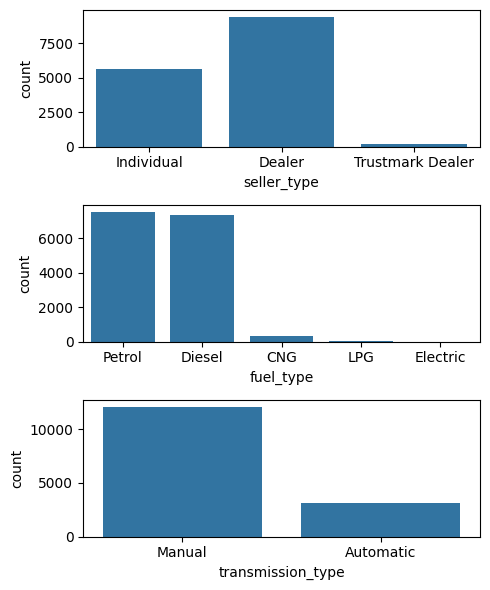

In [35]:
fig,ax = plt.subplots(3,1,figsize=(5,6))

for col,subplot in zip(['seller_type','fuel_type','transmission_type'],ax.flatten()):
    sns.countplot(x=col,data=df_cat,ax=subplot)
plt.tight_layout()
plt.show()

<u><b>Inference:</b></u>

- 'seller_type'<br>
   Most of the cars are being sold from 'Dealer' (9459) followed by 'Individual' sellers (5612).<br>
   There are fewer no. of cars(173) sold from 'Trustmark dealer'.

- 'fuel_type'<br>
   Most of the cars are being sold from 'Petrol' cars (7555), closely followed by 'Diesel' cars (7342) and followed by 'CNG' cars (299).<br>
   There are very few no. of 'Electric' cars(4) & 'LPG' cars(44) on sale.

- 'transmission_type'<br>
   Most of the cars on sale have 'Manual' transmission (12094).<br>
   There are fewer no. of cars that have 'Automatic' transmission (3150).

<h3>Top 10 cars that are being sold:</h3>

<b><u>Bar plot:</u></b>

In [36]:
df_cat['car_name'].nunique()

121

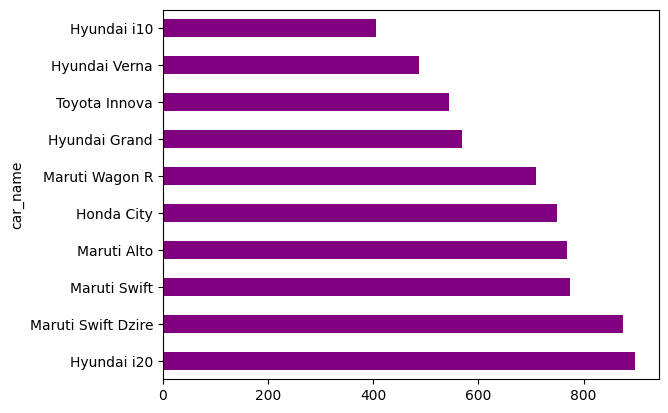

In [37]:
df_cat['car_name'].value_counts()[:10].plot(kind='barh',color='purple') # lets visualize the top 10 cars(in terms of the no. of cards on sale
plt.show()                                           # Since there are huge no. of subclasses within this categorical column

<u><b>Inference:</b></u>

- 'car_name'<br>
   Most of the cars on sale are 'Hyundai i20' (898), 'Maruti Swift Dzire' (875), 'Maruti Swift' (774) & 'Maruti Alto' (768) & 'Honda City' (750).<br>
   There are also luxury cars on sale like 'Mercedes-AMG C' , 'Ferrari GTC4Lusso', 'Force Gurkha' but fewer in numbers.<br>
   There are fewer luxury cars on sale compared to smaller cars like hatchbacks <br>

<h3>Top 10 brands that are being sold:</h3>

In [38]:
df_cat['brand'].nunique() # We have 31 unique cars

31

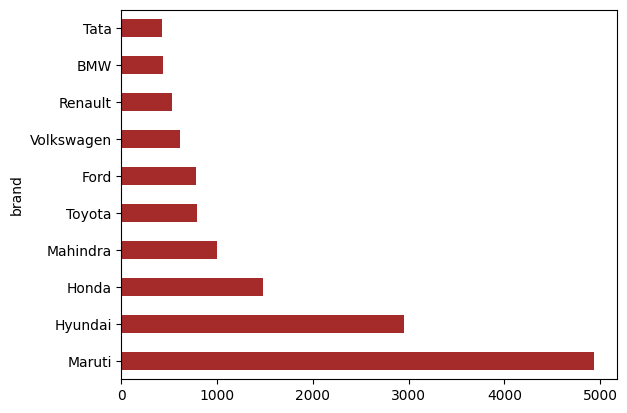

In [39]:
df_cat['brand'].value_counts()[:10].plot(kind='barh',color='brown') # lets visualize the top 10 cars(in terms of the no. of cards on sale
plt.show()                                           # Since there are huge no. of subclasses within this categorical column

<u><b>Inference:</b></u>

'brand'
- Most of the cars on sale are from the brand 'Maruti' (4933) which are smaller cars like 'Maruti Swift Dzire' & 'Maruti Swift' followed by 'Hyundai'.
- There are fewer luxury brands on sale like 'Maserati', 'Ferrari', 'Mercedes-AMG', 'Rolls-Royce' ,'Force' & 'Bentley'.

<h3>Top 10 brands that are being sold:</h3>

In [40]:
df_cat['model'].nunique()

120

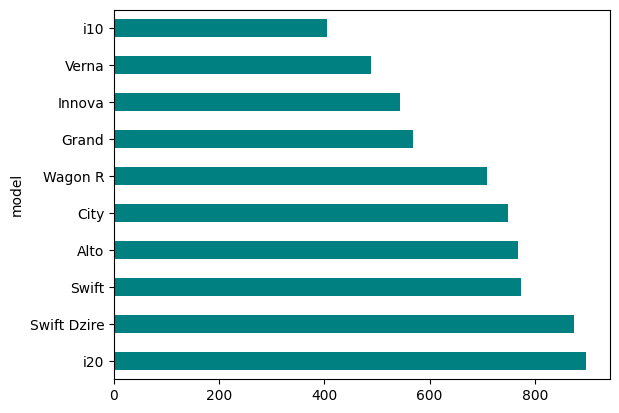

In [41]:
df_cat['model'].value_counts()[:10].plot(kind='barh',color='teal') # lets visualize the top 10 models(in terms of the no. of card) on sale
plt.show()                                           # since there are huge no. of subclasses within this categorical column

<u><b>Inference</b>:</u>

'model'
- Most of the cars on sale are 'i20' (898) closely followed by 'Swift Dzire' (875) & 'Swift' (774).
- There are few luxury cars on sale while most of the cars are smaller sedans or hatchbacks.

<hr>

### Bivariate analysis:
#### Numerical VS Numerical:

In [42]:
df_num.columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

<u><b>Lineplot</b></u> (Relationship between timeseries variables):

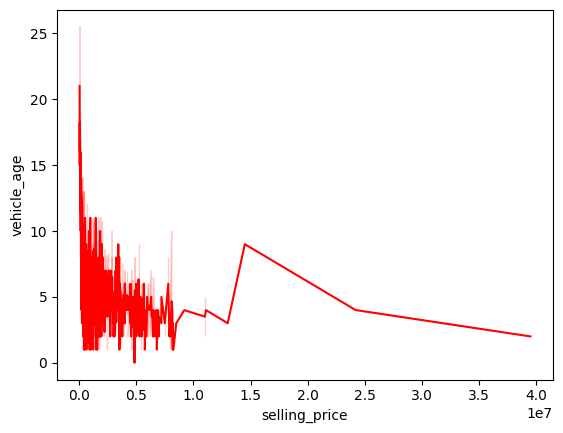

In [43]:
sns.lineplot(y='vehicle_age',x='selling_price',data=df_num,color='red')
plt.show()

<u><b>Inference</b></u>:
    
'vehicle_age' & 'selling_price'
- We can see as the vehicle age decreases the selling price tends to increase but on a smaller magnitude.
- Sparsely used cars have higher selling prices.
- Cars that have been used a lot have lower selling price.

<u><b>Scatter plot</b></u>: (Relationship between Numeric variable and Numeric variable)

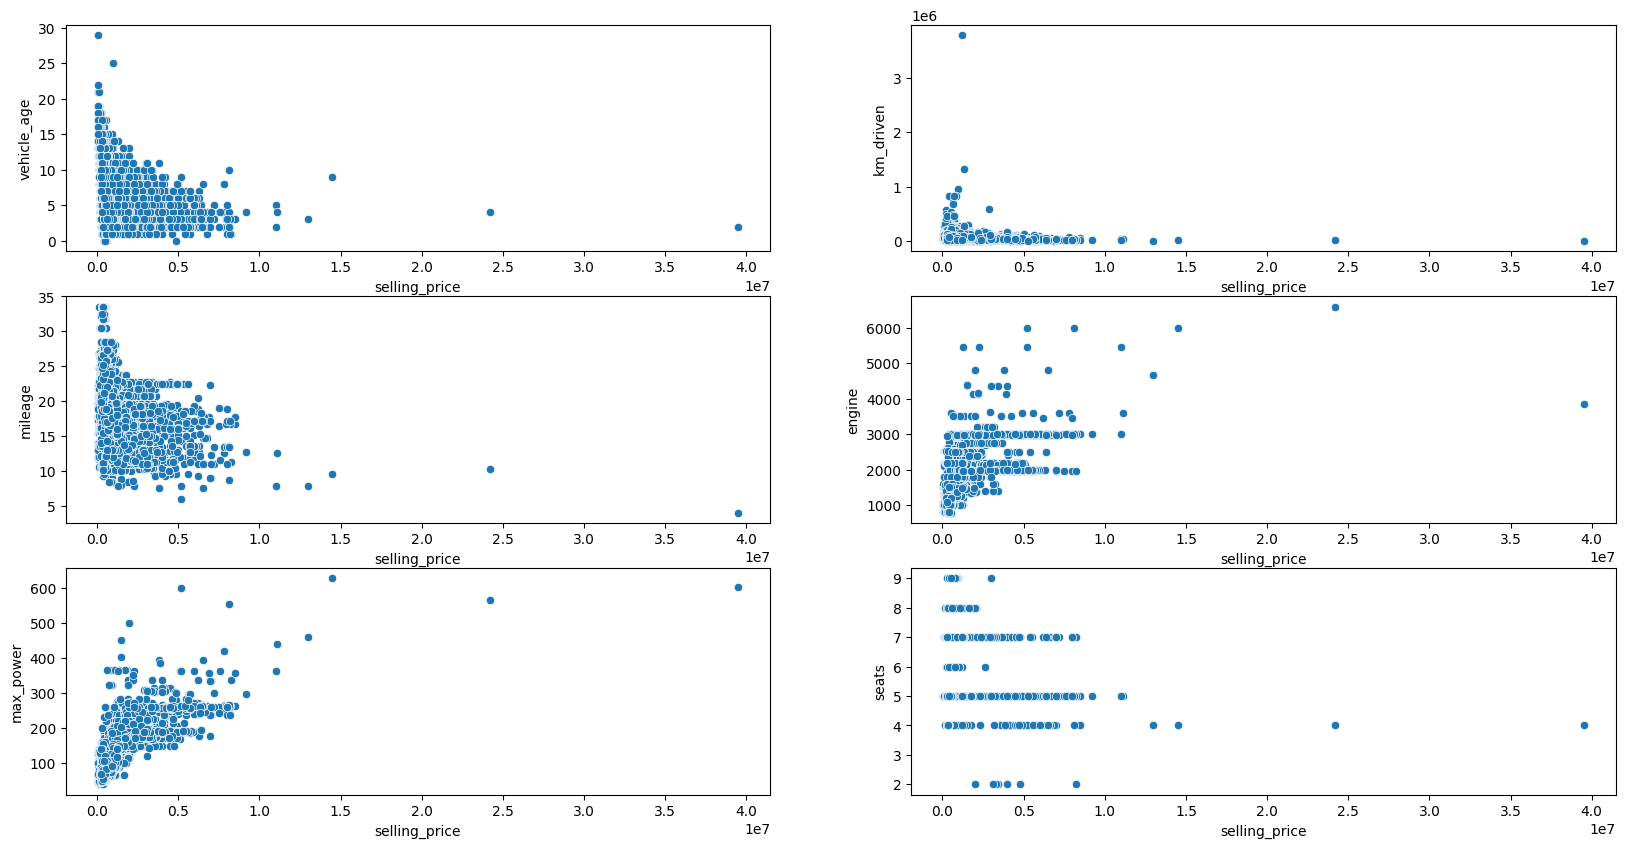

In [44]:
fig,ax = plt.subplots(3,2,figsize=(20,10))

for col,subplot in zip(['vehicle_age','km_driven', 'mileage', 'engine', 'max_power','seats'],ax.flatten()):
    sns.scatterplot(y=col,x='selling_price',data=df_num,ax=subplot)
plt.show()

<u><b>Regression plot</b></u>: (Extend of linear relationship between Numeric variable and Numeric variable)

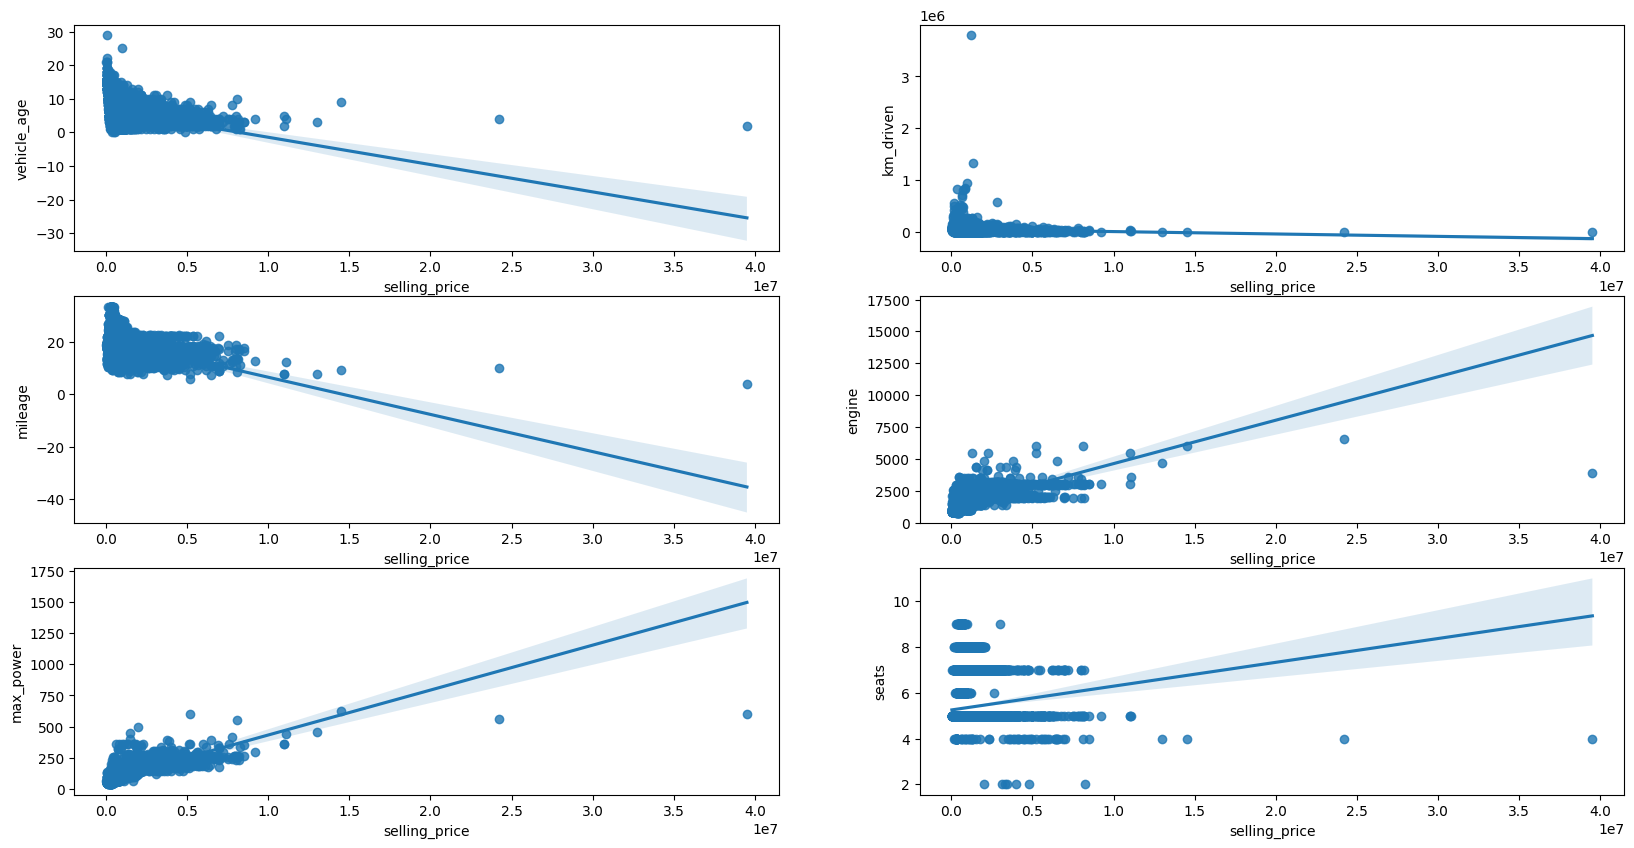

In [45]:
fig,ax = plt.subplots(3,2,figsize=(20,10))

for col,subplot in zip(['vehicle_age','km_driven', 'mileage', 'engine', 'max_power','seats'],ax.flatten()):
    sns.regplot(y=col,x='selling_price',data=df_num,ax=subplot)
plt.show()

<u><b>Inference</b></u>:

- 'km_driven' & 'selling_price':<br>
   We can't observe any direct relation between the no. of kilometers driven and the selling price of a car.<br>

- 'mileage' & 'selling_price':<br>
   We can see as the mileage decreases the selling price increases.<br>
   Since most of the cars are hatchbacks we can see they might provide  good mileage hence selling price of the hatchbacks might be low.<br>
   There are few luxury cars which give lower mileage but have high selling price.<br>

- 'engine' & 'selling_price':<br>
  We can see observe significant positive correlation because as the engine capacity increases the selling price also increases.<br>
  Hatchback and sedans have smaller price compared to luxury cars which have a higher selling price.<br>

- 'max_power' & 'selling_price':<br>
 We can see observe significant positive correlation because as maximum power increases the selling price also increases.<br>
 Hatchback and sedans (will have lower power) have smaller price compared to luxury cars (will have higher power) which have a higher selling price.<br>

- 'seats' & 'selling_price':<br>
 The number of seats might play a minor role in determining the selling price of a car as we can see for most cars as the seats increase the selling price also increases<br>

####  Categorical VS Numerical:

In [46]:
df_cat.columns

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

<b><u>Box plot</u></b>: (Detect the IQR, Minimum, Maximum, 25%, 50%, 75%, outliers of each subclass of the categotical 'x' variable in regards to the target numeric variable)

- <u>'car_name'  & 'selling_price'</u>

In [47]:
df_cat['car_name'].nunique() # there are huge no. of subclasses in this column

121

In [48]:
df_cat['car_name'].value_counts()[:10] # lets visualize the top 10 cars

car_name
Hyundai i20           898
Maruti Swift Dzire    875
Maruti Swift          774
Maruti Alto           768
Honda City            750
Maruti Wagon R        709
Hyundai Grand         569
Toyota Innova         544
Hyundai Verna         488
Hyundai i10           406
Name: count, dtype: int64

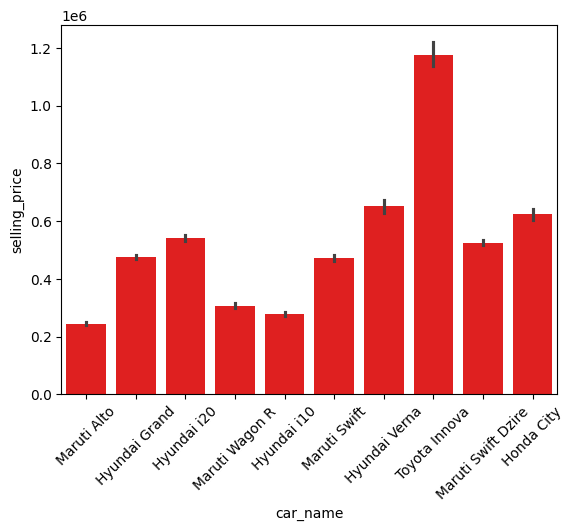

In [49]:
car_name_top10 = df_cat['car_name'].value_counts()[:10].index

sns.barplot(x='car_name',y='selling_price',data=df[df['car_name'].isin(car_name_top10)],color='red') # lets visualize the top 10 cars
plt.xticks(rotation=45)
plt.show()  

- <u>'brand' & 'selling_price'</u>

In [50]:
df_cat['brand'].nunique() # there are huge no. of subclasses in this column

31

In [51]:
df_cat['brand'].value_counts()[:10] # lets visualize the top 10 brands

brand
Maruti        4933
Hyundai       2952
Honda         1476
Mahindra       999
Toyota         789
Ford           776
Volkswagen     614
Renault        527
BMW            436
Tata           421
Name: count, dtype: int64

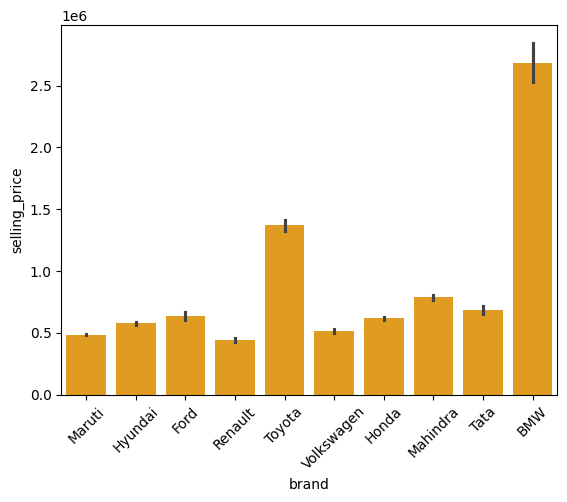

In [52]:
brand_top10 = df_cat['brand'].value_counts()[:10].index 

sns.barplot(x='brand',y='selling_price',data=df[df['brand'].isin(brand_top10)],color='orange') # lets visualize the top 10 cars
plt.xticks(rotation=45)
plt.show()  

- <u>'model' & 'selling_price'</u>

In [53]:
df_cat['model'].nunique() # there are huge no. of subclasses in this column

120

In [54]:
df_cat['model'].value_counts()[:10] # top 10 models

model
i20            898
Swift Dzire    875
Swift          774
Alto           768
City           750
Wagon R        709
Grand          569
Innova         544
Verna          488
i10            406
Name: count, dtype: int64

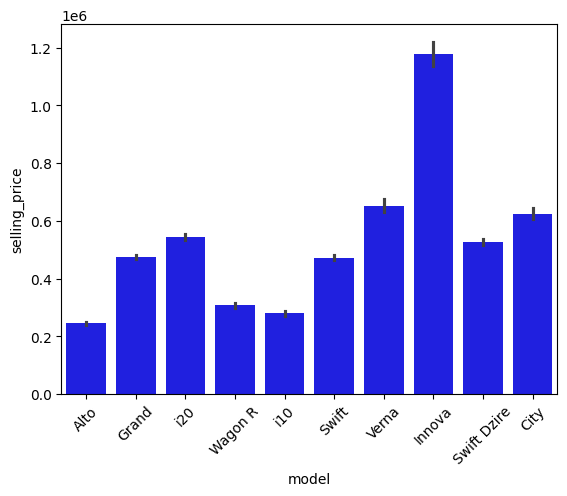

In [55]:
model_top10 = df_cat['model'].value_counts()[:10].index 

sns.barplot(x='model',y='selling_price',data=df[df['model'].isin(model_top10)],color='blue') # lets visualize the top 10 cars
plt.xticks(rotation=45)
plt.show()  

<u><b>Inference</b></u>:

- <u>'car_name', 'brand' & 'model' VS 'selling_price'</u><br>
 On average, most of the hatchbacks & smaller sedans (i10, i20, Swift, Alto, Swift Dzire) have smaller selling price.<br>
 On average, hatchback & smaller sedans brands like Maruti, Hyundai, Tata have smaller selling price. <br>
 There are also others brands like Toyota (Innova car) & BMW on sale which has considerably higher price.

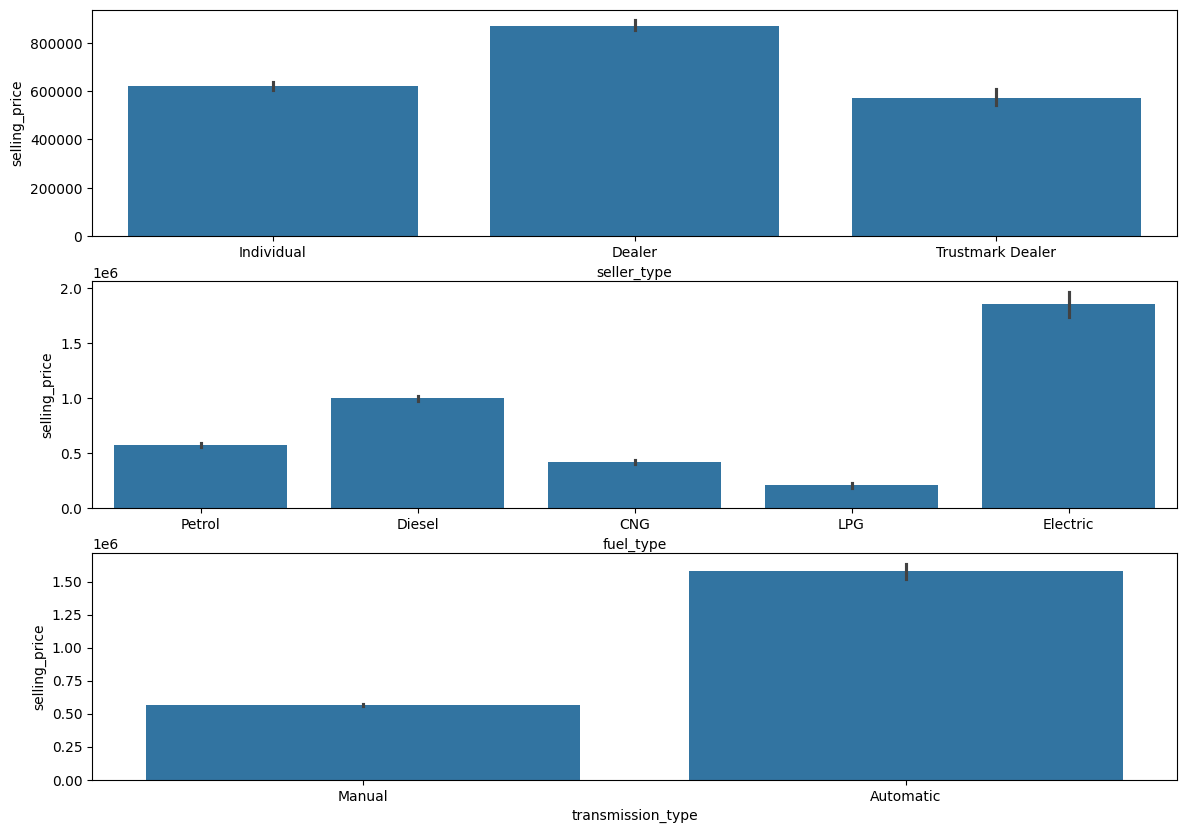

In [56]:
fig,ax = plt.subplots(3,1,figsize=(14,10))

for col,subplot in zip(['seller_type','fuel_type','transmission_type'],ax.flatten()):
    sns.barplot(x=col,y='selling_price',data=df,ax=subplot)
plt.show()

<b><u>Inference</b></u>:

- 'seller_type' VS 'selling_price'<br>
  On average, most of the 'Dealer'ship cars have higher price followed by 'Individual' sellers.<br>
  Cars from 'Trustmark Dealer' have lower selling price on average.<br>

- 'fuel_type' VS 'selling_price'<br>
  On average, 'Electric' cars  have higher selling price compared to other type of cars considering the aim of EVs is higher upfront cost followed by higher savings in the longer run whihc is followed by 'Diesel' type cars.<br>
  Lowest selling price is for 'LPG' fueled cars on average which might be to tempt buyers with lower price into this category given that most states lack good infrastructures for LPG fuel stations.<br>

- 'transmission_type' VS 'selling_price'<br>
  On average, Automatic cars have higher selling price which is expected given the additional technology involved in these cars.<br>
  Manual cars have lower selling price on average.

### Multivariate analysis:
<b>Numeric VS Numeric VS Numeric</b><br>
<b><u>Corellation matirx:</u></b>

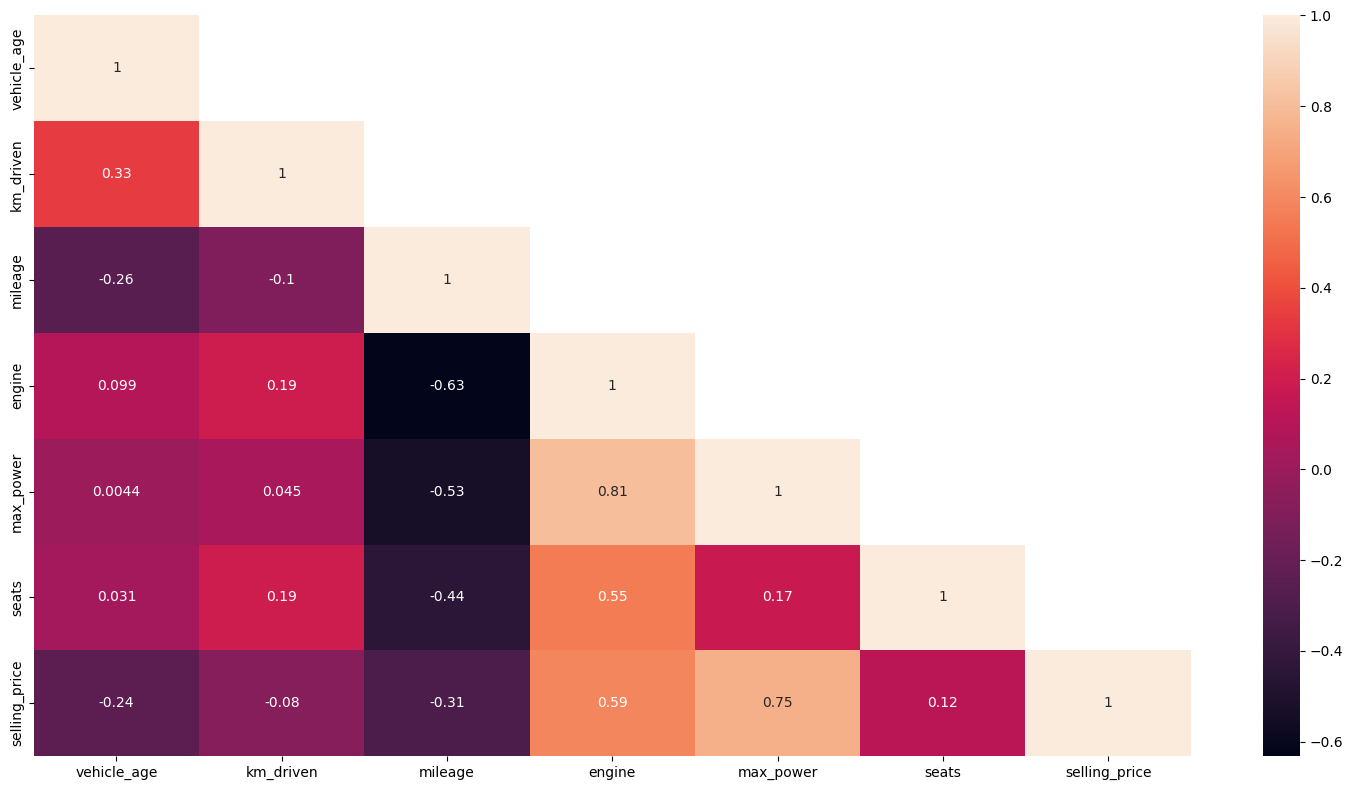

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(),annot=True,mask=np.triu(df_num.corr(),k=1))
plt.tight_layout()
plt.show()

<b><u>Inference:</u></b><br>

We can observe high positive correlation between:
- 'selling_price' & 'max_power' (0.75)
- 'selling_price' & 'engine' (0.59)
- 'seats' & 'engine' (0.55)
- 'max_power' & 'engine' (0.81)

We can observe weak positive correlation between:
- 'selling_price' & 'seats' (0.12)
- 'seats' & 'max_power' (0.17)
- 'km_driven' & 'engine' (0.19)
- 'km_driven' & 'seats' (0.19)
- 'km_driven' & 'vehicle_age' (0.33)

We can observe strong positive correlation between:
- 'max_power' & 'mileage' (-0.53)
- 'engine' & 'mileage' (-0.63)


We can observe weak negative correlation between:
- 'selling_price' & 'vehicle_age' (-0.24)
- 'selling_price' & 'mileage' (-0.31)
- 'seats' & 'mileage' (-0.44)
- 'mileage' & 'vehicle_age' (-0.26)
      
   

We can observe the presence of Multi-collinearity in few of the independent variables.<br>
- 'engine' & 'seats' [0.55]
-  'engine' & 'max_power' [0.81]
-  'km_driven' & 'vehicle_age' [0.33]
- 'engine' & 'mileage' [-0.63]
- 'max_power' & 'mileage' [-0.53]  

<hr>

### Statistical tests of significance (to find if any relationship exists between the 'x' variables and 'y' variable):

In [58]:
df_num.columns

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

<b>Assumptions of parametric tests </b>:<br>
 <b>i) Data normality</b>:
- Jarque_bera test:

In [59]:
for column in df_num.columns:
    print(column)
    print(stats.jarque_bera(df_num[column]),end='\n\n')

vehicle_age
SignificanceResult(statistic=2134.4187455352585, pvalue=0.0)

km_driven
SignificanceResult(statistic=2163795467.7610416, pvalue=0.0)

mileage
SignificanceResult(statistic=47.54158458762515, pvalue=4.747621373371636e-11)

engine
SignificanceResult(statistic=19209.261435873887, pvalue=0.0)

max_power
SignificanceResult(statistic=106272.4692536473, pvalue=0.0)

seats
SignificanceResult(statistic=18957.744450619703, pvalue=0.0)

selling_price
SignificanceResult(statistic=51557630.51760812, pvalue=0.0)



<b><u>Inference</b></u>:<br>
We can observe the numeric columns don't follow normality, since the pvalue<0.05

<b>ii) Data has equal variance</b>:

In [60]:
stats.levene(df['vehicle_age'],df['km_driven'],df['mileage'],df['engine'],df['max_power'],df['seats'])
# pvalue<0.05, we reject H0 concluding data is not normal

LeveneResult(statistic=5468.832355222446, pvalue=0.0)

<u><b>Inference</b></u>:
   - The data doesn't have equal variance, since pvalue<0.05

<b>Numeric (x) variable VS Numeric (y) variable</b>:

 Since the data doesn't follow normality and doesn't have equal variance we have opted for non-parametric tests.

### Statistical tests of significance 
### i) Numeric 'x' variables VS Numeric 'y' variable
#### Spearman R test 

- <u>'vehicle_age'</u>

In [61]:
stats.spearmanr(df['vehicle_age'],df['selling_price'])
# Since pvalue<0.05, there exists a relation between 'vehicle_age' & 'selling_price'.

SignificanceResult(statistic=-0.4778419245150903, pvalue=0.0)

- <u>'km_driven'</u>

In [62]:
stats.spearmanr(df['km_driven'],df['selling_price'])
# Since pvalue<0.05, there exists a relation between 'km_driven' & 'selling_price'.

SignificanceResult(statistic=-0.16536765489259422, pvalue=6.609620388976631e-94)

- <u>'mileage'</u>

In [63]:
stats.spearmanr(df['mileage'],df['selling_price'])
# Since pvalue<0.05, there exists a relation between 'mileage' & 'selling_price'.

SignificanceResult(statistic=-0.2783133197724431, pvalue=3.340997404990368e-269)

- <u>'engine'</u>

In [64]:
stats.spearmanr(df['engine'],df['selling_price'])
# Since pvalue<0.05, there exists a relation between 'engine' & 'selling_price'.

SignificanceResult(statistic=0.6429089193687566, pvalue=0.0)

- <u>'max_power'</u>

In [65]:
stats.spearmanr(df['max_power'],df['selling_price'])
# Since pvalue<0.05, there exists a relation between 'max_power' & 'selling_price'.

SignificanceResult(statistic=0.7211017364366183, pvalue=0.0)

- <u>'seats'</u>

In [66]:
stats.spearmanr(df['seats'],df['selling_price'])
# Since pvalue<0.05, there exists a relation between 'seats' & 'selling_price'.

SignificanceResult(statistic=0.26668201738109576, pvalue=1.6097198844233974e-246)

### ii) Categorical 'x' variables VS Numeric 'y' variable

In [67]:
df_cat.columns

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

- 'car_name'

In [68]:
stats.kruskal(*[df['selling_price'][df['car_name'] == name] for name in df['car_name'].unique()])

KruskalResult(statistic=10513.685313974212, pvalue=0.0)

- 'brand'

In [69]:
stats.kruskal(*[df['selling_price'][df['brand'] == brand] for brand in df['brand'].unique()])

KruskalResult(statistic=5199.545019329462, pvalue=0.0)

- 'model'

In [70]:
stats.kruskal(*[df['selling_price'][df['model'] == model] for model in df['model'].unique()])

KruskalResult(statistic=10513.683856567719, pvalue=0.0)

- 'seller_type'

In [71]:
stats.kruskal(*[df['selling_price'][df['seller_type'] == seller_type] for seller_type in df['seller_type'].unique()])

KruskalResult(statistic=340.828771486492, pvalue=9.771756464390217e-75)

- 'fuel_type'

In [72]:
stats.kruskal(*[df['selling_price'][df['fuel_type'] == fuel_type] for fuel_type in df['fuel_type'].unique()])

KruskalResult(statistic=2632.4519306990687, pvalue=0.0)

- 'transmission_type'

In [73]:
stats.kruskal(*[df['selling_price'][df['transmission_type'] == fuel_type] for fuel_type in df['transmission_type'].unique()])

KruskalResult(statistic=2889.6037815370455, pvalue=0.0)

<b>Inference</b>:
- Observing the pvalue of the Numeric & Categorical variables there seems to be a relationship between most of the 'x' variables and the 'y' variable.

<hr>

## Removing unnecessary features:
Dropping 'car_name' , 'brand' and 'model'

These features are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the car_name ,brand and model, we can create a model that is more accurate and reliable.

In [74]:
df.drop(labels=['car_name','brand','model'],axis=1,inplace=True)
df

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [75]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

In [76]:
df.to_csv('df_final.csv')

<hr>

## Encoding the categorical variables:
#### Label Encoder:

In [77]:
df_cat.columns

Index(['seller_type', 'fuel_type', 'transmission_type'], dtype='object')

In [78]:
le = LabelEncoder()
df_cat_encoded = df_cat.apply(le.fit_transform) 
df_cat_encoded

,seller_type,fuel_type,transmission_type
0,1,4,1
1,1,4,1
2,1,4,1
3,1,4,1
4,0,1,1
...,...,...,...
15406,0,4,1
15407,0,4,1
15408,0,1,1
15409,0,1,1


In [79]:
df_final = pd.concat((df_num,df_cat_encoded),axis=1)
df_final

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type,fuel_type,transmission_type
0,9,120000,19.70,796,46.30,5,120000,1,4,1
1,5,20000,18.90,1197,82.00,5,550000,1,4,1
2,11,60000,17.00,1197,80.00,5,215000,1,4,1
3,9,37000,20.92,998,67.10,5,226000,1,4,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,1
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0,4,1
15407,2,18000,17.50,1373,91.10,7,925000,0,4,1
15408,6,67000,21.14,1498,103.52,5,425000,0,1,1
15409,5,3800000,16.00,2179,140.00,7,1225000,0,1,1


In [80]:
df_final.to_csv('df_final_encoded.csv',index=False)

df_final = pd.read_csv('df_final_encoded.csv')
df_final

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type,fuel_type,transmission_type
0,9,120000,19.70,796,46.30,5,120000,1,4,1
1,5,20000,18.90,1197,82.00,5,550000,1,4,1
2,11,60000,17.00,1197,80.00,5,215000,1,4,1
3,9,37000,20.92,998,67.10,5,226000,1,4,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,1
...,...,...,...,...,...,...,...,...,...,...
15239,9,10723,19.81,1086,68.05,5,250000,0,4,1
15240,2,18000,17.50,1373,91.10,7,925000,0,4,1
15241,6,67000,21.14,1498,103.52,5,425000,0,1,1
15242,5,3800000,16.00,2179,140.00,7,1225000,0,1,1


### TrainTestSplit:
Split the dataset into:
- Train data - Data that is used by the model to learn patterns in the data.
- Test data - Data that is used by the model to perform actual predictions.

In [81]:
df_final_encoded = pd.read_csv('df_final_encoded.csv')
df_final_encoded.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type,fuel_type,transmission_type
0,9,120000,19.70,796,46.30,5,120000,1,4,1
1,5,20000,18.90,1197,82.00,5,550000,1,4,1
2,11,60000,17.00,1197,80.00,5,215000,1,4,1
3,9,37000,20.92,998,67.10,5,226000,1,4,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,1


In [82]:
x = df_final_encoded.drop(columns='selling_price',axis=1)
y = df_final_encoded['selling_price']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=4)

xtrain = xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)
xtest = xtest.reset_index(drop=True)
ytest = ytest.reset_index(drop=True)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(10670, 9) (10670,)
(4574, 9) (4574,)


**Statistical test to verify train test split has equal distribution**

In [83]:
#Null Hypothesis H0:mu1==mu2
#Alternate HYpothesis H1: mu1!=mu2

pvalue = stats.ttest_ind(ytrain,ytest).pvalue
alpha=0.05
if pvalue < alpha:
    print('Reject Null Hypothesis, data is not Equally distributed')
else:
    print('Fails to reject null hypothesis, data is equally distributed')

Fails to reject null hypothesis, data is equally distributed


- Train data:

In [84]:
xtrain

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type,fuel_type,transmission_type
0,2,11320,21.21,1197,81.80,5,1,4,1
1,4,50000,15.40,1997,120.00,9,1,1,1
2,6,100000,14.00,2179,138.10,7,1,1,1
3,6,72000,26.59,1248,74.00,5,0,1,1
4,7,76500,20.34,1498,103.20,5,1,1,1
...,...,...,...,...,...,...,...,...,...
10665,12,220000,12.80,2494,102.00,8,1,1,1
10666,7,14971,22.74,796,47.30,5,2,4,1
10667,4,65609,22.54,1396,88.73,5,0,1,1
10668,10,75000,19.81,1086,68.05,5,0,4,1


In [85]:
xtrain_cat = xtrain[['seller_type','fuel_type','transmission_type']]
xtrain_num = xtrain[['vehicle_age','km_driven','mileage','engine','max_power','seats']]

- Test data:

In [86]:
xtest

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type,fuel_type,transmission_type
0,6,20000,20.40,1197,81.80,5,1,4,1
1,5,94400,28.09,1248,88.50,5,1,1,1
2,8,75000,19.60,1461,108.45,5,0,1,1
3,5,36000,16.00,1997,140.00,7,1,1,1
4,5,32967,16.20,1199,74.00,5,0,4,1
...,...,...,...,...,...,...,...,...,...
4569,3,45156,21.21,1197,81.80,5,0,4,0
4570,5,20040,19.00,1199,88.70,5,0,4,0
4571,3,29100,21.70,1498,98.96,5,0,1,1
4572,6,56490,22.54,1396,88.73,5,0,1,1


In [87]:
xtest_cat = xtest[['seller_type','fuel_type','transmission_type']]
xtest_num = xtest[['vehicle_age','km_driven','mileage','engine','max_power','seats']]

### Scaling the data:

In [88]:
ss = StandardScaler()

- Scaling train data:

In [89]:
xtrain_scaled = pd.DataFrame(ss.fit_transform(xtrain_num),columns=xtrain_num.columns)
xtrain_scaled = pd.concat((xtrain_scaled,xtrain_cat),axis=1)
xtrain_scaled

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type,fuel_type,transmission_type
0,-1.339529,-1.056284,0.358108,-0.555134,-0.439442,-0.403624,1,4,1
1,-0.676368,-0.125434,-1.033365,0.982980,0.445540,4.555116,1,1,1
2,-0.013207,1.077837,-1.368660,1.332901,0.864863,2.075746,1,1,1
3,-0.013207,0.404005,1.646597,-0.457079,-0.620145,-0.403624,0,1,1
4,0.318373,0.512299,0.149746,0.023581,0.056333,-0.403624,1,1,1
...,...,...,...,...,...,...,...,...,...
10665,1.976275,3.965686,-1.656055,1.938534,0.028533,3.315431,1,1,1
10666,0.318373,-0.968421,0.724537,-1.326114,-1.238705,-0.403624,2,4,1
10667,-0.676368,0.250203,0.676638,-0.172528,-0.278894,-0.403624,0,1,1
10668,1.313114,0.476201,0.022813,-0.768547,-0.757988,-0.403624,0,4,1


- Scaling test data:

In [90]:
xtest_scaled = pd.DataFrame(ss.fit_transform(xtest_num),columns=xtest_num.columns)
xtest_scaled = pd.concat((xtest_scaled,xtest_cat),axis=1)
xtest_scaled

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type,fuel_type,transmission_type
0,-0.014639,-0.523325,0.178922,-0.556918,-0.435536,-0.409086,1,4,1
1,-0.346121,0.539423,2.030041,-0.459041,-0.277226,-0.409086,1,1,1
2,0.648325,0.262308,-0.013652,-0.050263,0.194162,-0.409086,0,1,1
3,-0.346121,-0.294777,-0.880236,0.978400,0.939640,2.072557,1,1,1
4,-0.346121,-0.338102,-0.832092,-0.553079,-0.619838,-0.409086,0,4,1
...,...,...,...,...,...,...,...,...,...
4569,-1.009085,-0.163991,0.373903,-0.556918,-0.435536,-0.409086,0,4,0
4570,-0.346121,-0.522754,-0.158083,-0.553079,-0.272500,-0.409086,0,4,0
4571,-1.009085,-0.393339,0.491855,0.020746,-0.030072,-0.409086,0,1,1
4572,-0.014639,-0.002093,0.694058,-0.175007,-0.271791,-0.409086,0,1,1


<hr>

#### Define a function to hold the model performance metrics and store the results in a dataframe:

In [91]:
perf_score = pd.DataFrame(columns=["Model", "R2 Score", "RMSE"])

# Function to calculate R2 score and RMSE
def per_measures(model, ytest, ypred):
    r2 = r2_score(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    return r2, rmse

# Function to update performance DataFrame
def update_performance(name, model, ytest, ypred):
    global perf_score
    r2, rmse = per_measures(model, ytest, ypred)
    new_row = pd.DataFrame([[name, r2, rmse]], columns=["Model", "R2 Score", "RMSE"])
    perf_score = pd.concat([perf_score, new_row], ignore_index=True)

<hr>

# Model building:
## Linear regression model (Base model):

- Building the base model:

In [92]:
lr = LinearRegression()
lr_base_model = lr.fit(xtrain,ytrain)
ypred_test_lr_bm = lr_base_model.predict(xtest)
ypred_train_lr_bm = lr_base_model.predict(xtrain)

- Model performance evaluation:

In [93]:
r2_score(ytest,ypred_test_lr_bm) 

0.640674752382249

In [94]:
r2_score(ytrain,ypred_train_lr_bm)

0.622915547526221

In [95]:
np.sqrt(mean_squared_error(ytest,ypred_test_lr_bm))

466942.06826601265

In [96]:
np.sqrt(mean_squared_error(ytrain,ypred_train_lr_bm))

577109.425479683

Update model performance:

In [97]:
update_performance("Linear Regression [Base model] - Test", lr_base_model, ytest, ypred_test_lr_bm )
update_performance("Linear Regression [Base model] - Train", lr_base_model, ytrain, ypred_train_lr_bm)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480


<b>Inference:</b>
- Model performance is moderate and it seems to generalize well and it not an overfit model.
- Let us try to build other models and try building a model with scaled and transformed data to see if it improves the model's predictive power.

## Ordinary Least Squared (OLS) [Base] model:
OLS or Ordinary Least Squares tries to find the best fit line which will pass through almost all the data points such that the error term is the least.

In [98]:
c_xtrain = sma.add_constant(xtrain)
c_xtest = sma.add_constant(xtest)
ols_bm = sma.OLS(ytrain,c_xtrain).fit()
ols_bm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1957.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:42:17   Log-Likelihood:            -1.5669e+05
No. Observations:               10670   AIC:                         3.134e+05
Df Residuals:                   10660   BIC:                         3.135e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.579e+05   1.12e+05     -7.643      0.000   -1.08e+06   -6.38e+05
vehicle_age       -5.824e+04   2205.783    -26.402      0.000   -6.26e+04   -5.39e+04
km_driven            -1.3589      0.159     -8.540      0.000      -1.671      -1.047
mileage            1.714e+04   2458.131      6.971      0.000    1.23e+04     2.2e+04
engine               73.3148     30.056      2.439      0.015      14.400     132.230
max_power          1.608e+04    293.450     54.785      0.000    1.55e+04    1.67e+04
seats              1.255e+04   1.06e+04      1.183      0.237   -8233.987    3.33e+04
seller_type        4061.2869   1.13e+04      0.359      0.720   -1.81e+04    2.63e+04
fuel_type         -1282.4154   5636.487     -0.228      0.820   -1.23e+04    9766.150
transmission_type -8.329e+04    1.7e+04     -4.904      0.000   -1.17e+05      -5e+04
==============================================================================
Omnibus:                    22064.337   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274224737.578
Skew:                          16.934   Prob(JB):                         0.00
Kurtosis:                     787.644   Cond. No.                     1.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Inference:</b>
- Model performance is slightly lower than the Linear regression base model.The performance is moderate and it seems to generalize well and it not an overfit model.
- Considering the model is not performing very well to the expected level let us see if the data at hand fits the assumptions of a Linear regression model to see if any assumptions are violated maybe reflecting on the model performance.

### Assumptions of linear Regression:

i) <u><b>Target variable is numeric</b></u>

In [99]:
df_final['selling_price'].dtype

dtype('int64')

<u>Inference</u>:
   - Yes, the assumption is satisfied since our dependent variable 'selling_price' is a continous variable. 

ii) <u><b>Residuals should follow normal distribution</b></u>

<b>- Jarque bera test</b>:
We will be using Jarque bera test for normal distribution as the no. of data points is greater than 5000.

In [100]:
stats.jarque_bera(ols_bm.resid)

SignificanceResult(statistic=274224737.5784066, pvalue=0.0)

<u>Inference</u>:
   - Since the pvalue<0.05 we failed to reject H0, concluding <u>the residuals don't follow normal distribution</u>.

<b>- QQ plot</b>:

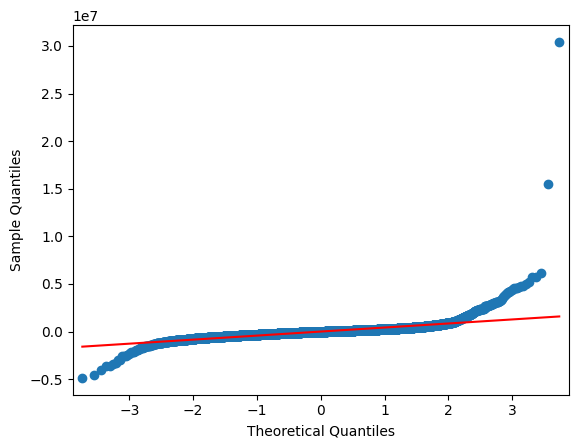

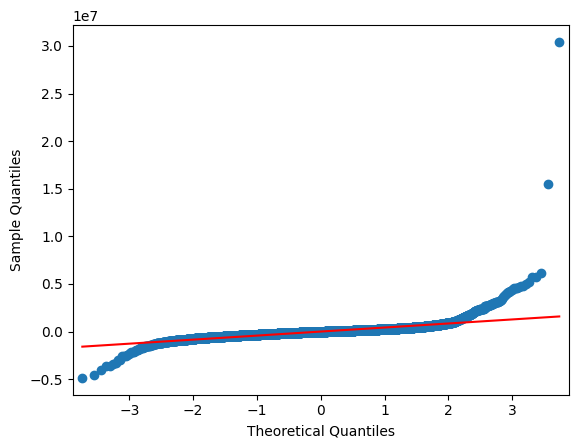

In [101]:
sma.qqplot(ols_bm.resid,line='r')

<u>Inference</u>:
  - Since there are data points that don't lie on the reference line(which is plotted at 45*), we conclude <u>the residuals don't follow normal distribution</u>.

iii) <u><b>Linear relationship exists between dependent and independent variables</b></u>

<b>- Rainbow test</b>:

In [102]:
linear_rainbow(ols_bm)

(1.3885574606665512, 3.06074926654273e-33)

<u>Inference:</u>
   - Since the pvalue<0.05 we conclude <u>data lacks linear relationship between the dependent varialble</u>.

iv) <u><b>Absence of Multi-collinearity</b></u>

<b>- Condition Number</b>:

In [103]:
ols_bm.condition_number

1391642.5330722404

<u>Inference</u>:
 - Since the condition number > 1000 , it suggests <u>presence of severe multicollinearity</u>.

<b>- Variance inflation factor</b>:

In [104]:
vif_data = pd.Series([variance_inflation_factor (x.values,i) for i in range(len(x.columns))])
vif_data.index = x.columns

In [105]:
vif_data[vif_data>5] # Columns with Multi-Collinearity

vehicle_age           5.671415
mileage              17.425372
engine               70.042797
max_power            29.377610
seats                65.550496
transmission_type     7.291344
dtype: float64

In [106]:
vif_data[vif_data<5] # Column without Multi-Collinearity

km_driven      2.659737
seller_type    1.683239
fuel_type      4.349312
dtype: float64

<u>Inference</u>:
 - VIF value (>5) suggests existence of moderate multi-collinearity between the above columns.

v) <u><b>Absence of Auto-correlation</b></u>

<b>- Durbin watson test</b>:

In [107]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(ols_bm.resid) 

1.9658671981017046

<u>Inference</u>:
- Since the value (2) lies between 1.5 and 2.5 we can see we don't observe any auto correlation.

vi) <u><b>Absence of Heteroscedasticity:</b></u>

In [108]:
import statsmodels.stats.api as smsa
smsa.het_breuschpagan(ols_bm.resid,ols_bm.model.exog)

(568.0377462499195,
 1.5087161138902284e-116,
 66.60182802907403,
 7.791424146951003e-120)

<u>Inference:</u>
- Since pvalue<0.05, Indicating the presence of heterocedasticity in the residuals of the regression model.

<b><u>Inference</u></b>:<br>
We can see the below assumptions of the Linear regression model are violated:
- Residuals should follow normal distribution
- Linear relationship exists between dependent and independent variables
- Absence of Multi-collinearity
- Absence of Heteroscedasticity<br><br>
Given that the data at hand doesn't meet the requirements of the Linear regression model has directly reflected to the Linear regression model poor predictive power. Let us try to build a Linear regression model with
- Scaled data
- Transformed data<br>
to see if it can help boost the model's predictive power.

<hr>

## Linear regression model (Scaled data):

In [109]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_scaled_model = lr.fit(xtrain_scaled,ytrain)
ypred_test_lr_scaled = lr_scaled_model.predict(xtest_scaled)
ypred_train_lr_scaled = lr_scaled_model.predict(xtrain_scaled)

Model evaluation:

In [110]:
r2_score(ytest,ypred_test_lr_scaled) 

0.6416358277756997

In [111]:
r2_score(ytrain,ypred_train_lr_scaled) 

0.6229155475262211

In [112]:
np.sqrt(mean_squared_error(ytest,ypred_test_lr_scaled))

466317.1928749992

In [113]:
np.sqrt(mean_squared_error(ytrain,ypred_train_lr_scaled))

577109.425479683

Update model performance:

In [114]:
update_performance("Linear Regression [Scaled data] - Test", lr_scaled_model, ytest,ypred_test_lr_scaled)
update_performance("Linear Regression [Scaled data] - Train", lr_scaled_model, ytrain, ypred_train_lr_scaled)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480


- OLS model:

In [115]:
c_xtrain = sma.add_constant(xtrain_scaled)
c_xtest = sma.add_constant(xtest_scaled)
ols_scaled_model = sma.OLS(ytrain,c_xtrain).fit()
ols_scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1957.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:42:20   Log-Likelihood:            -1.5669e+05
No. Observations:               10670   AIC:                         3.134e+05
Df Residuals:                   10660   BIC:                         3.135e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.489e+05   2.04e+04     41.637      0.000    8.09e+05    8.89e+05
vehicle_age       -1.756e+05   6652.335    -26.402      0.000   -1.89e+05   -1.63e+05
km_driven         -5.647e+04   6611.672     -8.540      0.000   -6.94e+04   -4.35e+04
mileage            7.155e+04   1.03e+04      6.971      0.000    5.14e+04    9.17e+04
engine             3.813e+04   1.56e+04      2.439      0.015    7489.521    6.88e+04
max_power          6.939e+05   1.27e+04     54.785      0.000    6.69e+05    7.19e+05
seats              1.012e+04   8551.255      1.183      0.237   -6642.001    2.69e+04
seller_type        4061.2869   1.13e+04      0.359      0.720   -1.81e+04    2.63e+04
fuel_type         -1282.4154   5636.487     -0.228      0.820   -1.23e+04    9766.150
transmission_type -8.329e+04    1.7e+04     -4.904      0.000   -1.17e+05      -5e+04
==============================================================================
Omnibus:                    22064.337   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274224737.578
Skew:                          16.934   Prob(JB):                         0.00
Kurtosis:                     787.644   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<u>Inference</u>:
- Very slight improvement in the Model performance with using scaled data compared to using normal data.

<hr>

### Transformation (of Numeric data):

- Power transformer:

In [116]:
pt = PowerTransformer()
xtrain_transformed = pd.DataFrame(data=pt.fit_transform(xtrain_num),columns=xtrain_num.columns)
xtrain_transformed = pd.concat((xtrain_transformed,xtrain_cat),axis=1)
xtrain_transformed

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type,fuel_type,transmission_type
0,-1.671424,-1.634087,0.377466,-0.477711,-0.314139,-0.358683,1,4,1
1,-0.602110,0.079283,-1.033495,1.151519,0.779334,3.076533,1,1,1
2,0.159736,1.210169,-1.389620,1.368192,1.116586,2.017388,1,1,1
3,0.159736,0.642390,1.609379,-0.318368,-0.647768,-0.358683,0,1,1
4,0.475528,0.742659,0.172148,0.319320,0.381145,-0.358683,1,1,1
...,...,...,...,...,...,...,...,...,...
10665,1.692051,2.848118,-1.700969,1.675000,0.348602,2.639015,1,1,1
10666,0.475528,-1.371554,0.734144,-2.352858,-2.429634,-0.358683,2,4,1
10667,-0.602110,0.492442,0.687825,0.084067,-0.058840,-0.358683,0,1,1
10668,1.261031,0.709689,0.046132,-0.870822,-0.943861,-0.358683,0,4,1


In [117]:
pt = PowerTransformer()
xtest_transformed = pd.DataFrame(data=pt.fit_transform(xtest_num),columns=xtest_num.columns)
xtest_transformed = pd.concat((xtest_transformed,xtest_cat),axis=1)
xtest_transformed

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type,fuel_type,transmission_type
0,0.152966,-1.037715,0.197419,-0.469348,-0.301530,-0.370526,1,4,1
1,-0.201288,1.047405,1.974770,-0.312232,-0.052539,-0.370526,1,1,1
2,0.755833,0.680053,0.006021,0.236127,0.532975,-0.370526,0,1,1
3,-0.201288,-0.349413,-0.874098,1.139374,1.163821,2.030391,1,1,1
4,-0.201288,-0.459614,-0.824320,-0.462961,-0.637958,-0.370526,0,4,1
...,...,...,...,...,...,...,...,...,...
4569,-1.079826,-0.053227,0.389811,-0.469348,-0.301530,-0.370526,0,4,0
4570,-0.201288,-1.035557,-0.138466,-0.462961,-0.045591,-0.370526,0,4,0
4571,-1.079826,-0.611383,0.505540,0.316991,0.279057,-0.370526,0,1,1
4572,0.152966,0.257984,0.702823,0.084774,-0.044551,-0.370526,0,1,1


<hr>

## Linear regression model (Transformed data):

- Build the model

In [118]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_transformed_model = lr.fit(xtrain_transformed,ytrain)
ypred_test_lr_transformed = lr_transformed_model.predict(xtest_transformed)
ypred_train_lr_transformed = lr_transformed_model.predict(xtrain_transformed)

- Model evaluation

In [119]:
r2_score(ytest,ypred_test_lr_transformed) 

0.5341263550998372

In [120]:
r2_score(ytrain,ypred_train_lr_transformed) 

0.4438280862385552

In [121]:
np.sqrt(mean_squared_error(ytest,ypred_test_lr_transformed))

531683.5297315618

In [122]:
np.sqrt(mean_squared_error(ytrain,ypred_train_lr_transformed))

700879.537795567

Update model performance:

In [123]:
update_performance("Linear Regression [Scaled data] - Test", lr_transformed_model, ytest,ypred_test_lr_transformed)
update_performance("Linear Regression [Scaled data] - Train", lr_transformed_model, ytrain, ypred_train_lr_transformed)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480
4,Linear Regression [Scaled data] - Test,0.534126,531683.529732
5,Linear Regression [Scaled data] - Train,0.443828,700879.537796


- OLS model:

In [124]:
c_xtrain = sma.add_constant(xtrain_transformed)
c_xtest = sma.add_constant(xtest_transformed)
ols_scaled_transformed_model = sma.OLS(ytrain,c_xtrain).fit()
ols_scaled_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     945.2
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:42:22   Log-Likelihood:            -1.5876e+05
No. Observations:               10670   AIC:                         3.175e+05
Df Residuals:                   10660   BIC:                         3.176e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.464e+06   2.46e+04     59.484      0.000    1.42e+06    1.51e+06
vehicle_age       -1.793e+05   9131.141    -19.638      0.000   -1.97e+05   -1.61e+05
km_driven         -1.143e+05   9188.220    -12.443      0.000   -1.32e+05   -9.63e+04
mileage            -1.91e+05   1.24e+04    -15.395      0.000   -2.15e+05   -1.67e+05
engine              4.16e+04   2.02e+04      2.056      0.040    1931.757    8.13e+04
max_power          2.785e+05   1.61e+04     17.271      0.000    2.47e+05     3.1e+05
seats             -1.134e+05   8870.555    -12.781      0.000   -1.31e+05    -9.6e+04
seller_type       -2.681e+04   1.38e+04     -1.940      0.052   -5.39e+04     278.640
fuel_type         -1.296e+05   7418.316    -17.468      0.000   -1.44e+05   -1.15e+05
transmission_type -4.454e+05   1.98e+04    -22.456      0.000   -4.84e+05   -4.07e+05
==============================================================================
Omnibus:                    22533.222   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        244624129.998
Skew:                          17.906   Prob(JB):                         0.00
Kurtosis:                     743.911   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<u>Inference:</u><br><br>
Linear regression model:
- Model performance has significantly dropped with using transformed data compared to using normal data.

OLS model:
- Model performance (is poor compated to Linear regression model) has significantly dropped with using transformed data compared to using normal data.

<h1>RFE</h1>
Recursive feature elimination to find the significant columns to build the model with.

In [125]:
lr_rfe_model = LinearRegression()
rfe_model = RFE(estimator=lr_rfe_model,n_features_to_select=5)
rfe_model = rfe_model.fit(xtrain_scaled,ytrain)
feat_index = pd.Series(data=rfe_model.ranking_,index=xtrain_scaled.columns)
feat_index

vehicle_age          1
km_driven            1
mileage              1
engine               2
max_power            1
seats                3
seller_type          4
fuel_type            5
transmission_type    1
dtype: int32

In [126]:
rfe_columns = list(feat_index[feat_index==1].index)
rfe_columns

['vehicle_age', 'km_driven', 'mileage', 'max_power', 'transmission_type']

### Logistic regression model - Normal data (RFE columns):

- Build the model:

In [127]:
lr = LinearRegression()
lr_rfe = lr.fit(xtrain[rfe_columns],ytrain)
ypred_test_lr_rfe = lr_rfe.predict(xtest[rfe_columns])
ypred_train_lr_rfe = lr_rfe.predict(xtrain[rfe_columns])

- Model evaluation:

In [128]:
r2_score(ytest,ypred_test_lr_rfe) 

0.6388894802207137

In [129]:
r2_score(ytrain,ypred_train_lr_rfe) 

0.6221177579225168

In [130]:
np.sqrt(mean_squared_error(ytest,ypred_test_lr_rfe))

468100.6089018512

Update model performance:

In [131]:
update_performance("Linear Regression [RFE columns] - Test", lr_rfe, ytest, ypred_test_lr_rfe)
update_performance("Linear Regression [RFE columns] - Train", lr_rfe, ytrain, ypred_train_lr_rfe)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480
4,Linear Regression [Scaled data] - Test,0.534126,531683.529732
5,Linear Regression [Scaled data] - Train,0.443828,700879.537796
6,Linear Regression [RFE columns] - Test,0.638889,468100.608902
7,Linear Regression [RFE columns] - Train,0.622118,577719.592026


### Logistic regression model - Scaled data (RFE columns):

- Build the model:

In [132]:
lr = LinearRegression()
lr_rfe_scaled = lr.fit(xtrain_scaled[rfe_columns],ytrain)
ypred_test_lr_rfe_scaled = lr_rfe_scaled.predict(xtest_scaled[rfe_columns])
ypred_train_lr_rfe_scaled = lr_rfe_scaled.predict(xtrain_scaled[rfe_columns])

- Model evaluation:

In [133]:
r2_score(ytest,ypred_test_lr_rfe_scaled) 

0.637924420173744

In [134]:
r2_score(ytrain,ypred_train_lr_rfe_scaled) 

0.6221177579225169

In [135]:
np.sqrt(mean_squared_error(ytest,ypred_test_lr_rfe_scaled))

468725.68592633994

In [136]:
np.sqrt(mean_squared_error(ytrain,ypred_train_lr_rfe_scaled))

577719.5920261474

Update model performance:

In [137]:
update_performance("Linear Regression [RFE & scaled] - Test", lr_rfe_scaled, ytest, ypred_test_lr_rfe_scaled)
update_performance("Linear Regression [RFE & scaled] - Train", lr_rfe_scaled, ytrain, ypred_train_lr_rfe_scaled)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480
4,Linear Regression [Scaled data] - Test,0.534126,531683.529732
5,Linear Regression [Scaled data] - Train,0.443828,700879.537796
6,Linear Regression [RFE columns] - Test,0.638889,468100.608902
7,Linear Regression [RFE columns] - Train,0.622118,577719.592026
8,Linear Regression [RFE & scaled] - Test,0.637924,468725.685926
9,Linear Regression [RFE & scaled] - Train,0.622118,577719.592026


### Logistic regression model - Transformed data (RFE columns):

- Build the model:

In [138]:
lr = LinearRegression()
lr_rfe_transformed = lr.fit(xtrain_transformed[rfe_columns],ytrain)
ypred_test_lr_rfe_transformed = lr_rfe_transformed.predict(xtest_transformed[rfe_columns])
ypred_train_lr_rfe_transformed = lr_rfe_transformed.predict(xtrain_transformed[rfe_columns])

- Model evaluation:

In [139]:
r2_score(ytest,ypred_test_lr_rfe_transformed) 

0.5014235405377699

In [140]:
r2_score(ytrain,ypred_train_lr_rfe_transformed) 

0.41587439399093884

In [141]:
np.sqrt(mean_squared_error(ytest,ypred_test_lr_rfe_transformed))

550028.2811760784

In [142]:
np.sqrt(mean_squared_error(ytrain,ypred_train_lr_rfe_transformed))

718277.0270651749

Update model performance:

In [143]:
update_performance("Linear Regression [RFE & transformed] - Test", lr_rfe_transformed, ytest, ypred_test_lr_rfe_transformed)
update_performance("Linear Regression [RFE & transformed] - Train", lr_rfe_transformed, ytrain, ypred_train_lr_rfe_transformed)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480
4,Linear Regression [Scaled data] - Test,0.534126,531683.529732
5,Linear Regression [Scaled data] - Train,0.443828,700879.537796
6,Linear Regression [RFE columns] - Test,0.638889,468100.608902
7,Linear Regression [RFE columns] - Train,0.622118,577719.592026
8,Linear Regression [RFE & scaled] - Test,0.637924,468725.685926
9,Linear Regression [RFE & scaled] - Train,0.622118,577719.592026


<b><u>Inference</u></b>:
 - Model performance has slightly dropped when using the top 5 RFE significant columns.

### OLS model - Scaled data (RFE columns):

In [144]:
c_xtrain = sma.add_constant(xtrain_scaled[rfe_columns])
c_xtest = sma.add_constant(xtest_scaled[rfe_columns])
ols_rfe_scaled_model = sma.OLS(ytrain,c_xtrain).fit()
ols_rfe_scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     3511.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:42:24   Log-Likelihood:            -1.5670e+05
No. Observations:               10670   AIC:                         3.134e+05
Df Residuals:                   10664   BIC:                         3.135e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               8.35e+05   1.43e+04     58.572      0.000    8.07e+05    8.63e+05
vehicle_age       -1.802e+05   6441.873    -27.973      0.000   -1.93e+05   -1.68e+05
km_driven         -4.674e+04   6185.719     -7.556      0.000   -5.89e+04   -3.46e+04
mileage            5.649e+04   6954.424      8.123      0.000    4.29e+04    7.01e+04
max_power          7.217e+05   7610.695     94.824      0.000    7.07e+05    7.37e+05
transmission_type  -6.77e+04   1.66e+04     -4.088      0.000      -1e+05   -3.52e+04
==============================================================================
Omnibus:                    21873.761   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        258978939.574
Skew:                          16.599   Prob(JB):                         0.00
Kurtosis:                     765.508   Cond. No.                         5.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS model - Normal data (RFE columns):

In [145]:
c_xtrain = sma.add_constant(xtrain[rfe_columns])
c_xtest = sma.add_constant(xtest[rfe_columns])
ols_rfe_model = sma.OLS(ytrain,c_xtrain).fit()
ols_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     3511.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:42:24   Log-Likelihood:            -1.5670e+05
No. Observations:               10670   AIC:                         3.134e+05
Df Residuals:                   10664   BIC:                         3.135e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.935e+05   5.23e+04    -13.272      0.000   -7.96e+05   -5.91e+05
vehicle_age       -5.975e+04   2135.998    -27.973      0.000   -6.39e+04   -5.56e+04
km_driven            -1.1248      0.149     -7.556      0.000      -1.417      -0.833
mileage            1.353e+04   1665.558      8.123      0.000    1.03e+04    1.68e+04
max_power          1.672e+04    176.317     94.824      0.000    1.64e+04    1.71e+04
transmission_type  -6.77e+04   1.66e+04     -4.088      0.000      -1e+05   -3.52e+04
==============================================================================
Omnibus:                    21873.761   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        258978939.573
Skew:                          16.599   Prob(JB):                         0.00
Kurtosis:                     765.508   Cond. No.                     6.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS model - Transformed data (RFE columns):

In [146]:
c_xtrain = sma.add_constant(xtrain_transformed[rfe_columns])
c_xtest = sma.add_constant(xtest_transformed[rfe_columns])
ols_rfe_transformed_model = sma.OLS(ytrain,c_xtrain).fit()
ols_rfe_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1518.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:42:25   Log-Likelihood:            -1.5902e+05
No. Observations:               10670   AIC:                         3.181e+05
Df Residuals:                   10664   BIC:                         3.181e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.145e+06   1.71e+04     66.946      0.000    1.11e+06    1.18e+06
vehicle_age       -1.606e+05   8998.107    -17.845      0.000   -1.78e+05   -1.43e+05
km_driven         -6.434e+04   8690.178     -7.403      0.000   -8.14e+04   -4.73e+04
mileage            -5.68e+04   8727.814     -6.508      0.000   -7.39e+04   -3.97e+04
max_power          4.203e+05   9265.054     45.359      0.000    4.02e+05    4.38e+05
transmission_type  -4.59e+05   1.97e+04    -23.266      0.000   -4.98e+05    -4.2e+05
==============================================================================
Omnibus:                    22252.424   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        223585147.872
Skew:                          17.398   Prob(JB):                         0.00
Kurtosis:                     711.307   Cond. No.                         5.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Inference:
- We can't see model performance has not significantly improved compared to building a Linear regression model using the RFE columns.

<hr>

## Non Paramteric models:
## Decision Tree:

Now that we know the data fails to satisfy the assumptions of the Linear regression model, let us try to build a Decision tree which makes no assumptions on the data to see if the model performance increases compared to a Linear Regression model.

- Build the model:

In [147]:
dt = DecisionTreeRegressor(random_state=4)
dt_model = dt.fit(xtrain, ytrain)
ypred_dt_test = dt_model.predict(xtest)
ypred_dt_train = dt_model.predict(xtrain)

- Model evaluation:

In [148]:
r2_score(ytest,ypred_dt_test) 

0.8261606933552589

In [149]:
r2_score(ytrain,ypred_dt_train) 

0.9995951462557822

In [150]:
np.sqrt(mean_squared_error(ytest,ypred_dt_test))

324782.87839915376

In [151]:
np.sqrt(mean_squared_error(ytrain,ypred_dt_train))

18909.84348344989

Update model performance:

In [152]:
update_performance("Decision Tree - Test", dt_model, ytest, ypred_dt_test)
update_performance("Decision Tree - Train", dt_model, ytrain, ypred_dt_train)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480
4,Linear Regression [Scaled data] - Test,0.534126,531683.529732
5,Linear Regression [Scaled data] - Train,0.443828,700879.537796
6,Linear Regression [RFE columns] - Test,0.638889,468100.608902
7,Linear Regression [RFE columns] - Train,0.622118,577719.592026
8,Linear Regression [RFE & scaled] - Test,0.637924,468725.685926
9,Linear Regression [RFE & scaled] - Train,0.622118,577719.592026


<b><u>Inference:</b></u>
- Observing the model performance metrics it looks like the model is able to perform very well on test data and even better on training data meaning, the model seems to overfit rather than generalize which is not the preferred outcome.
- We know that Decision Tree tends to overfit, hence let us try to prune the decision tree but finding the best hyper parameters with the help of GridSearch CV and try to see if we can reduce the overfitting of the Decision Tree model.

### Grid Search CV:

In [154]:
'''
tuned_parameters = [{'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                     'max_depth': [30, 35, 40],
                     'min_samples_split': range(50, 100, 10),
                     'min_samples_leaf': range(10, 50, 10),
                    }]

decision_tree_regression = DecisionTreeRegressor(random_state=4)

tree_grid = GridSearchCV(estimator=decision_tree_regression,
                         param_grid=tuned_parameters,
                         cv=5,
                         scoring='neg_mean_squared_error') 

tree_grid_model = tree_grid.fit(xtrain, ytrain)
print('Best parameters for Random Forest regressor: ', tree_grid_model.best_params_, '\n')
'''

Best parameters for Random Forest regressor:  {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 60} 



In [ ]:
# Best parameters for Random Forest regressor:  {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 60} 

## Decision Tree (Hyper parameter tuned):

- Build the model:

In [155]:
dt = DecisionTreeRegressor(random_state=4,criterion= 'squared_error', max_depth= 30, min_samples_leaf= 10, min_samples_split= 60)
dt_tuned_model = dt.fit(xtrain, ytrain)
ypred_dt_test_tuned = dt_tuned_model.predict(xtest)
ypred_dt_train_tuned = dt_tuned_model.predict(xtrain)

- Model evaluation

In [156]:
r2_score(ytest,ypred_dt_test_tuned) 

0.7919172766671272

In [157]:
r2_score(ytrain,ypred_dt_train_tuned) 

0.8199023060648449

In [158]:
np.sqrt(mean_squared_error(ytest,ypred_dt_test_tuned))

355334.31309515407

In [159]:
np.sqrt(mean_squared_error(ytrain,ypred_dt_train_tuned))

398834.69421474374

Update model performance:

In [160]:
update_performance("Decision Tree (Tuned) - Test", dt_tuned_model, ytest, ypred_dt_test_tuned)
update_performance("Decision Tree (Tuned) - Train", dt_tuned_model, ytrain, ypred_dt_train_tuned)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480
4,Linear Regression [Scaled data] - Test,0.534126,531683.529732
5,Linear Regression [Scaled data] - Train,0.443828,700879.537796
6,Linear Regression [RFE columns] - Test,0.638889,468100.608902
7,Linear Regression [RFE columns] - Train,0.622118,577719.592026
8,Linear Regression [RFE & scaled] - Test,0.637924,468725.685926
9,Linear Regression [RFE & scaled] - Train,0.622118,577719.592026


<u><b>Inference:</u></b>
- We can see the test data score has dropped slightly compared to the Decision tree model without the usage of hyper parameters.
- We can also observe the training data has significantly dropped meaning the overfitting has reduced and model leans towards generalization hence making the predicting power on future unseen data more reliable & consistent.

<hr>

## Random Forest:

- Build the model:

In [173]:
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error')

rf_model = rf.fit(xtrain, ytrain)

ypred_rf_test = rf_model.predict(xtest)
ypred_rf_train = rf_model.predict(xtrain)

- Model evaluation:

In [174]:
r2_score(ytest,ypred_rf_test) 

0.8841048821882648

In [175]:
r2_score(ytrain,ypred_rf_train) 

0.9786940390236396

In [177]:
np.sqrt(mean_squared_error(ytest,ypred_rf_test))

265186.68019224633

In [178]:
np.sqrt(mean_squared_error(ytrain,ypred_rf_train))

137179.56386317685

Update model performance:

In [176]:
update_performance("Random Forest - Test", rf_model, ytest, ypred_rf_test)
update_performance("Random Forest - Train", rf_model, ytrain, ypred_rf_train)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480
4,Linear Regression [Scaled data] - Test,0.534126,531683.529732
5,Linear Regression [Scaled data] - Train,0.443828,700879.537796
6,Linear Regression [RFE columns] - Test,0.638889,468100.608902
7,Linear Regression [RFE columns] - Train,0.622118,577719.592026
8,Linear Regression [RFE & scaled] - Test,0.637924,468725.685926
9,Linear Regression [RFE & scaled] - Train,0.622118,577719.592026


<b><u>Inference:</u></b>
- Model tends to overfit we might need to prune the individual decision trees that are being built with the help of hyper parameters.

### Grid Search CV:

In [167]:
'''
tuned_parameters = [{'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                     'max_depth': [30, 35, 40],
                     'min_samples_split': range(50, 100, 10),
                     'min_samples_leaf': range(10, 50, 10),
                    }]

random_forest_regression = RandomForestRegressor(random_state=4)

grid_search = GridSearchCV(estimator=random_forest_regression,
                           param_grid=tuned_parameters,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           verbose=1,
                           n_jobs=-1) 

grid_search.fit(xtrain, ytrain)

print('Best parameters for Random Forest regressor: ', grid_search.best_params_, '\n')
'''

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters for Random Forest regressor:  {'criterion': 'poisson', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 50} 



In [ ]:
# Fitting 5 folds for each of 240 candidates, totalling 1200 fits
# Best parameters for Random Forest regressor:  {'criterion': 'poisson', 'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 50} 

## Random Forest (Hyper parameter tuned) :

In [169]:
rf = RandomForestRegressor(n_estimators=100, criterion='poisson', random_state=4, max_depth= 50, min_samples_leaf= 10, min_samples_split= 50)
rf_model_tuned = rf.fit(xtrain, ytrain)

ypred_rf_test_tuned = rf_model_tuned.predict(xtest)
ypred_rf_train_tuned = rf_model_tuned.predict(xtrain)

In [170]:
r2_score(ytest,ypred_rf_test_tuned) 

0.9049577020577381

In [172]:
r2_score(ytrain,ypred_rf_train_tuned) 

0.8072988600950415

In [179]:
update_performance("Random Forest (Hyper parameter tuned) - Test", rf_model_tuned, ytest, ypred_rf_test_tuned)
update_performance("Random Forest (Hyper parameter tuned) - Train", rf_model_tuned, ytrain, ypred_rf_train_tuned)
perf_score

,Model,R2 Score,RMSE
0,Linear Regression [Base model] - Test,0.640675,466942.068266
1,Linear Regression [Base model] - Train,0.622916,577109.425480
2,Linear Regression [Scaled data] - Test,0.641636,466317.192875
3,Linear Regression [Scaled data] - Train,0.622916,577109.425480
4,Linear Regression [Scaled data] - Test,0.534126,531683.529732
5,Linear Regression [Scaled data] - Train,0.443828,700879.537796
6,Linear Regression [RFE columns] - Test,0.638889,468100.608902
7,Linear Regression [RFE columns] - Train,0.622118,577719.592026
8,Linear Regression [RFE & scaled] - Test,0.637924,468725.685926
9,Linear Regression [RFE & scaled] - Train,0.622118,577719.592026


<b><u>Inference:</u></b>
- The random forest regression model appears to perform better with the help of Hyper parameters.
- The Test R² (0.904958) is higher than the Train R² (0.807299).
- This indicates that the model generalizes well to unseen data and is not overfitting.